# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>MIGUEL ÁNGEL FERNÁNDEZ ALONSO</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

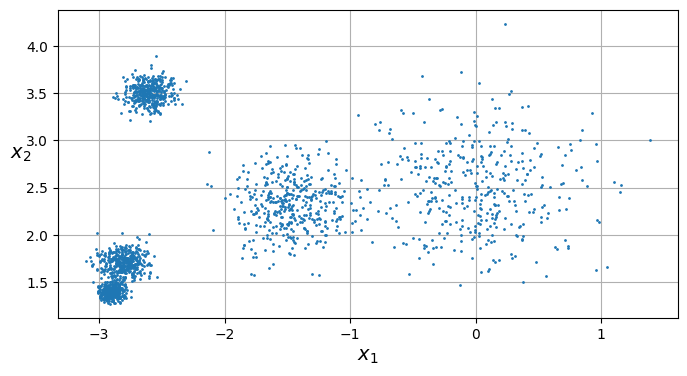

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

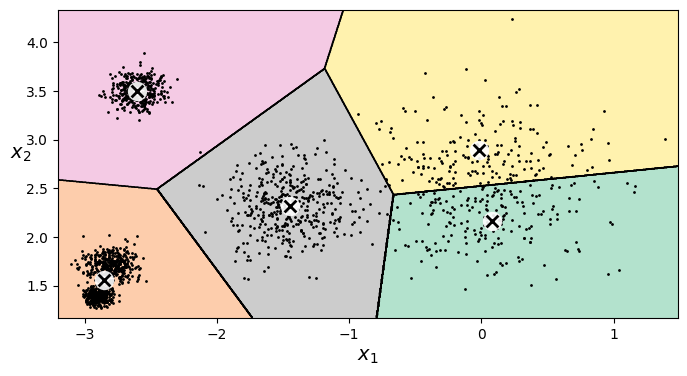

Centros de los 5 clusters:
[[ 0.0783778   2.16451394]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]
 [-0.0207084   2.89114195]
 [-1.44785999  2.31813847]]


In [ ]:
# Apartado 1
k = 5
kmeans = KMeans(n_clusters=k, n_init=1)
kmeans.fit(X)
#A CUBRIR POR EL ALUMNADO



#Apartado 2
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Apartado 2 - continuación
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

print("Centros de los 5 clusters:")
print(kmeans.cluster_centers_)

In [ ]:
#Apartado 3
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
#A CUBRIR POR EL ALUMNADO

#Predicción usando clustering duro (predict)
labels_hard = kmeans.predict(X_new)
print("Predicción con enfoque de clustering duro:")
print(labels_hard)

#Predicción utilizando clustering flexible (transform)
labels_soft = kmeans.transform(X_new)
print("\nPredicción con enfoque de clustering flexible:")
print(labels_soft)

Predicción con enfoque de clustering duro:
[0 0 2 1]

Predicción con enfoque de clustering flexible:
[[0.18223039 2.88604435 3.00245465 0.89138253 1.48240029]
 [2.92625035 5.86829444 5.79854651 3.14941474 4.45922309]
 [3.18974087 1.45428401 0.63877213 2.98127968 1.69530934]
 [3.09660472 0.95827092 1.07572208 3.00485781 1.56275789]]


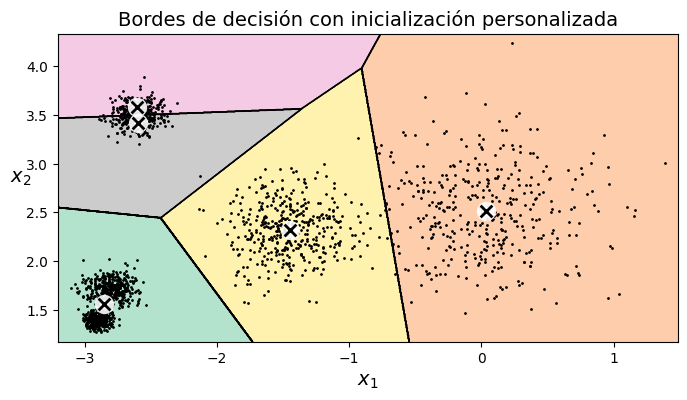

Centros de los 5 clusters con inicialización personalizada:
[[-2.85127128  1.55334118]
 [ 0.03369891  2.50939959]
 [-2.60560857  3.57952617]
 [-1.44662744  2.31979215]
 [-2.59695667  3.41423603]]


In [ ]:
#Apartado 4
good_init = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])

kmeans_custom_init = KMeans(n_clusters=5, n_init=1, init=good_init)
kmeans_custom_init.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_custom_init, X)
plt.title("Bordes de decisión con inicialización personalizada")
plt.show()

print("Centros de los 5 clusters con inicialización personalizada:")
print(kmeans_custom_init.cluster_centers_)
#A CUBRIR POR EL ALUMNADO

In [ ]:
#Apartado 5
print("Inercia del modelo:", kmeans_custom_init.inertia_)
print("Score del modelo ", kmeans_custom_init.score(X))


Inercia del modelo: 230.5011041005127
Score del modelo  -230.50110410051263


La métrica del rendimiento utilizada por el algoritmo **KMeans** es la inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. El algoritmo se ejecuta **n_init** veces y selecciona el modelo con la inercia más baja, un modelo con una inercia menor es una mejor solución.

La inercia del modelo se obtiene a través de la variable de instancia **inertia_**. Sin embargo, en *Scikit-Learn*, el método **score()** de la clase *KMeans* devuelve la inercia negativa. La razón de esto es que *Scikit-Learn* utiliza la convención de maximizar las puntuaciones para indicar un mejor rendimiento. Dado que en el caso de la inercia, una puntuación más baja indica un mejor rendimiento, *Scikit-Learn* devuelve el negativo de este valor para que al maximizar la puntuación se esté minimizando la inercia.

Estos valores coinciden ya que **score()** devuelve la inercia negativa.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


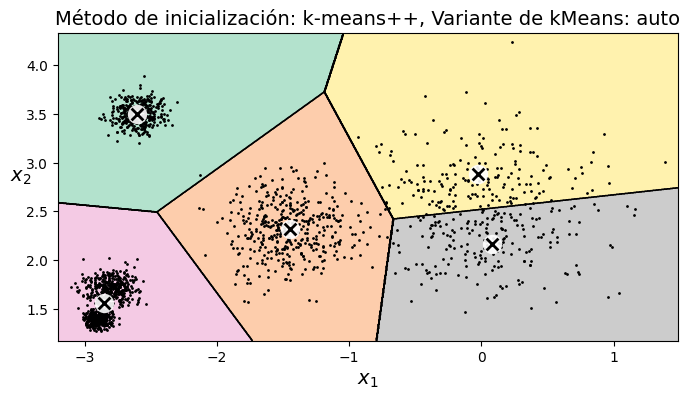

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


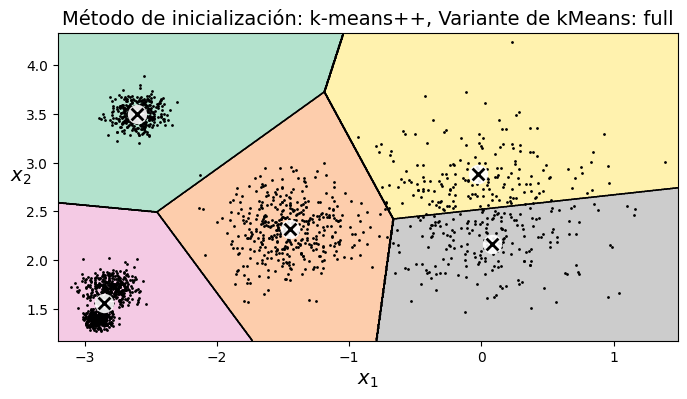

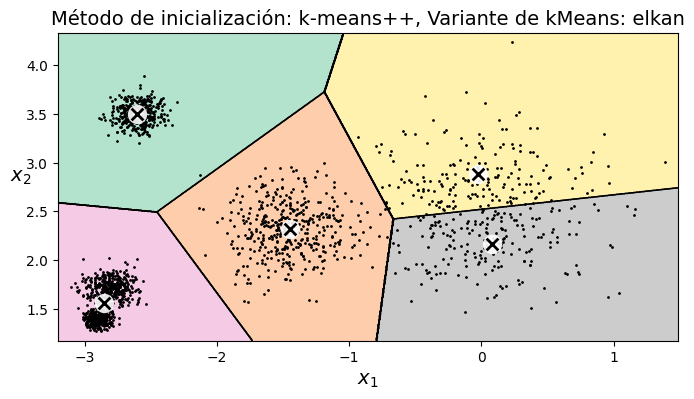

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


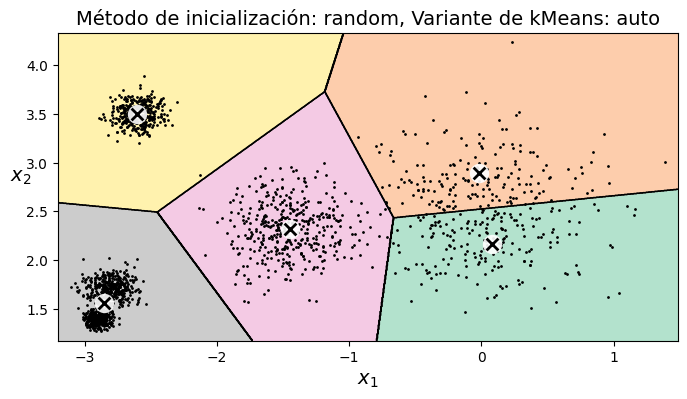

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


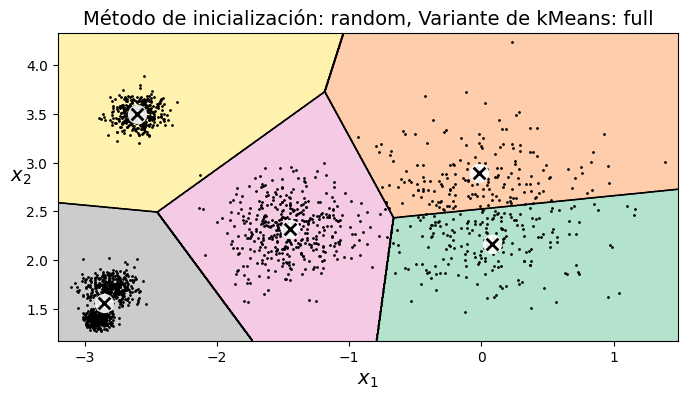

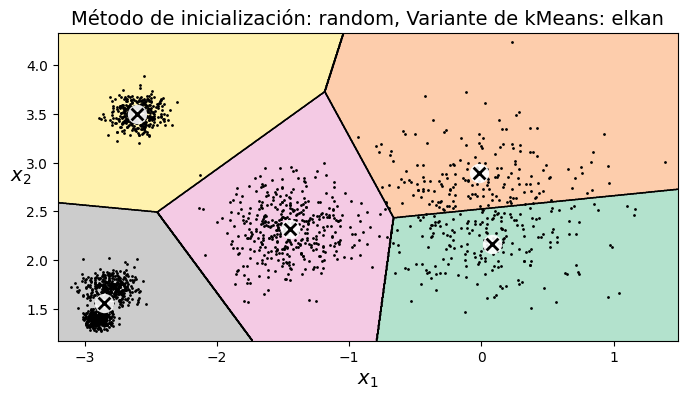

In [ ]:
#Apartado 6
#Definimos una función para visualizar los resultados de k-Medias
def plot_kmeans_result(kmeans, X, title):
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(kmeans, X)
  plt.title(title)
  plt.show()

#Definimos diferentes métodos de inicialización y variantes de kMeans
init_methods = ['k-means++', 'random']
algorithm_variants = ['auto', 'full', 'elkan']

#Iteramos sobre los diferentes métodos de inicialización y variantes de kMeans
for init_method in init_methods:
  for algorithm in algorithm_variants:
    #Creamos y ajustamos el modelo kMeans con los parámeros especificados
    kmeans = KMeans(n_clusters=5, init=init_method, algorithm=algorithm, n_init=10, random_state=42)
    kmeans.fit(X)

    #Visualizamos los resultados
    title = f"Método de inicialización: {init_method}, Variante de kMeans: {algorithm}"
    plot_kmeans_result(kmeans, X, title)

Métodos de inicialización:

'k-means++': Este método selecciona los centroides iniciales de manera inteligente para acelerar la convergencia del algoritmo. Los centroides se eligen de forma que estén generalmente separados entre sí.
'random': Este método elige los centroides iniciales de forma aleatoria de entre los datos de entrada.

Variantes de k-Medias:
'auto': Scikit-Learn elige automáticamente el algoritmo más adecuado según el tamaño y la densidad de los datos.
'full': Esta es la implementación estándar de k-Medias, que utiliza la matriz de distancia completa entre todas las instancias y centroides en cada paso de iteración.

'elkan': Esta es una versión más eficiente del algoritmo k-Medias que utiliza la desigualdad triangular y reduce la cantidad de cálculos de distancia.
Para comparar gráficamente los resultados de diferentes métodos de inicialización y variantes de k-Medias, podemos ajustar varios modelos con diferentes combinaciones de estos hiperparámetros y visualizar los bordes de decisión y los centroides resultantes.

Las diferencias en los resultados pueden depender de varios factores, incluyendo la naturaleza de los datos, la inicialización de los centroides y la variante del algoritmo. Algunos métodos de inicialización pueden ser más sensibles a la distribución de los datos y pueden converger más rápido o producir soluciones más estables que otros.

En este código, iteramos sobre diferentes combinaciones de métodos de inicialización (init_methods) y variantes de k-Medias (algorithm_variants). Para cada combinación, creamos un modelo KMeans con los parámetros especificados y ajustamos el modelo a los datos. Luego, visualizamos los resultados utilizando la función plot_kmeans_result, que muestra los bordes de decisión y los centroides del modelo.

Al ejecutar este código, obtendremos gráficos que muestran los resultados de cada combinación de métodos de inicialización y variantes de k-Medias. Podemos comparar visualmente estos resultados y observar cualquier diferencia significativa en la forma en que los clusters se forman y distribuyen.

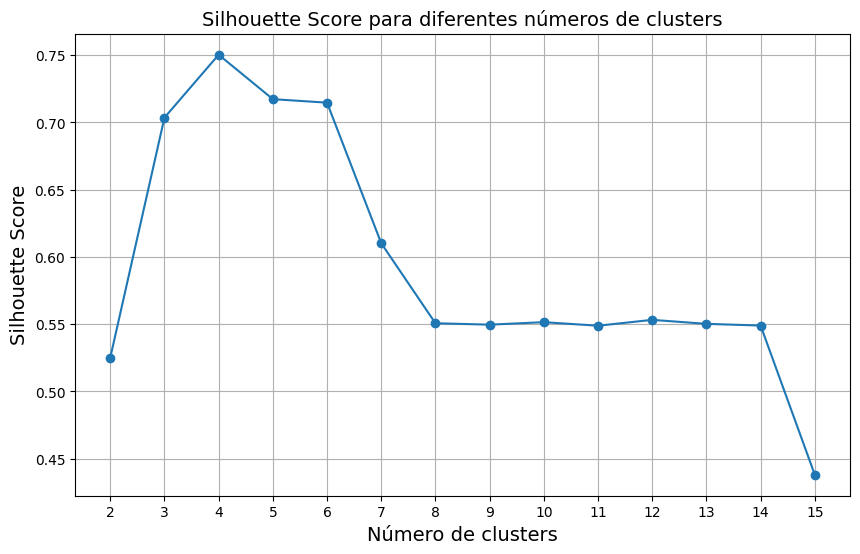

In [ ]:
#Apartado 7
from sklearn.metrics import silhouette_score

#A CUBRIR POR EL ALUMNADO

#Inicializar una lista para almacenar los silhouette score
silhouette_scores = []

#Definir el número de clusters a probar
num_clusters_range = range(2,16)

#Iterar sobre diferentes números de clusters
for num_clusters in num_clusters_range:
  #Crear y ajustar el modelo KMeans
  kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
  kmeans.fit(X)

  #Calcular el silhouette score y añadirlo a la lista
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)

#Visualizar el silhouette score para diferentes números de clusters
plt.figure(figsize=(10,6))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score para diferentes números de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 16, step=1))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


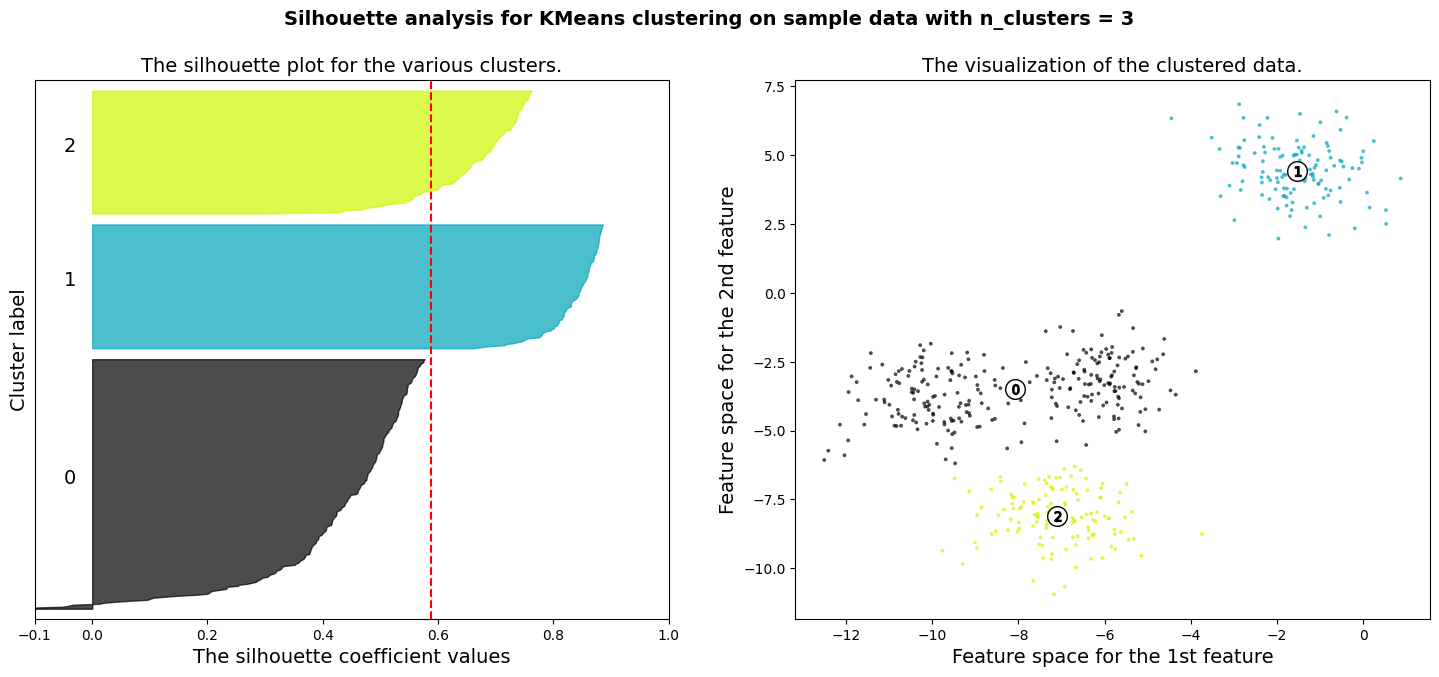

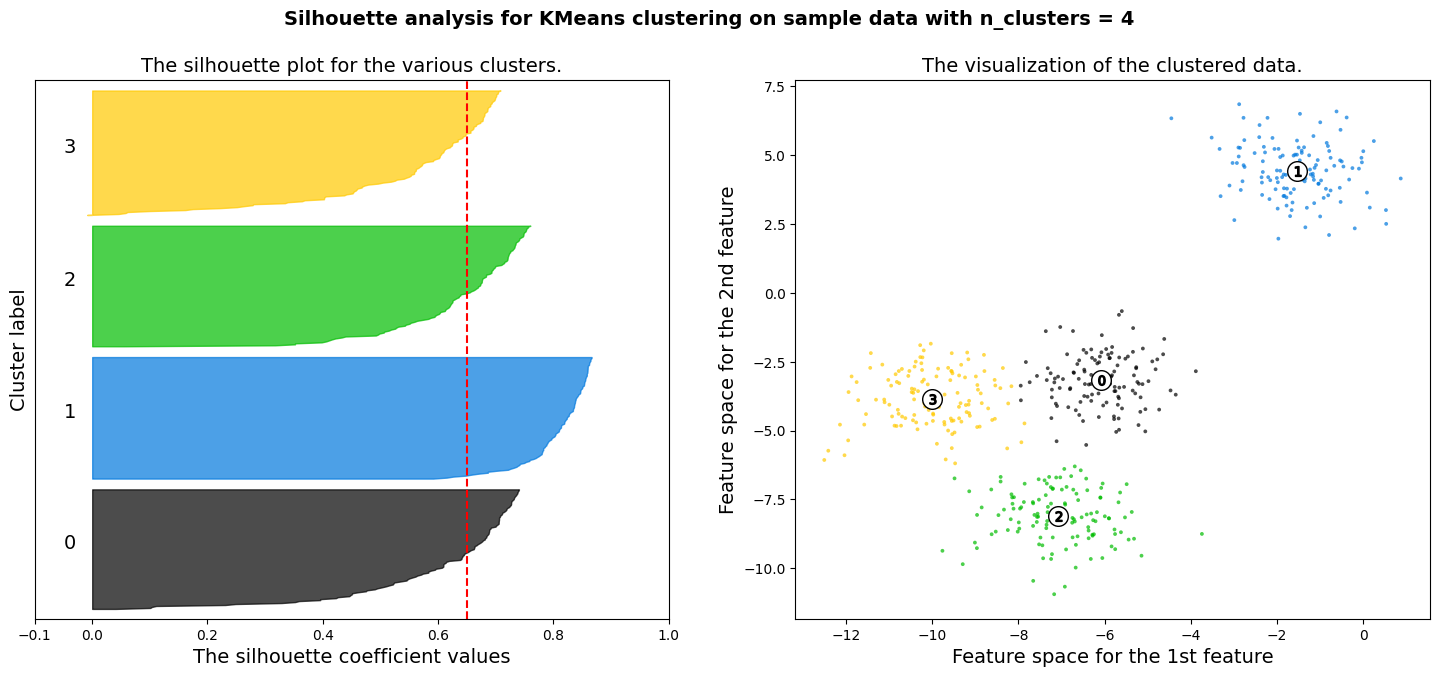

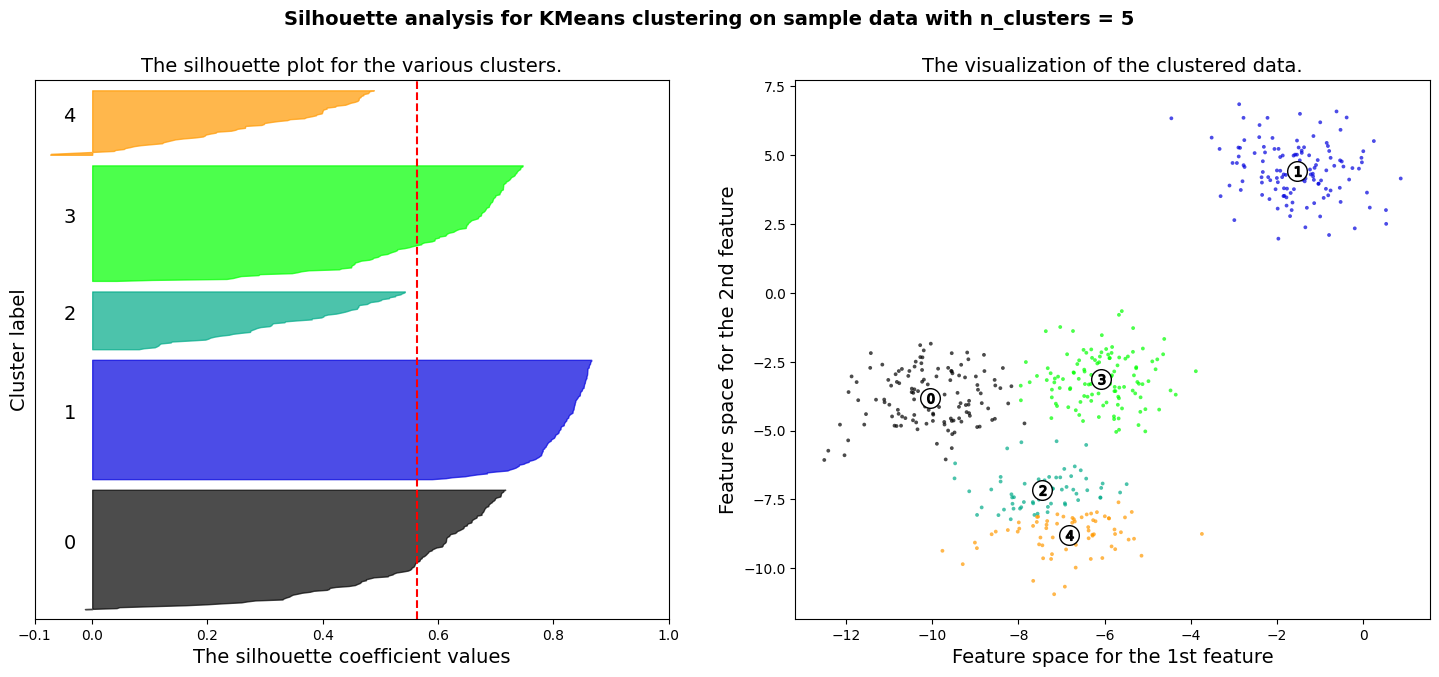

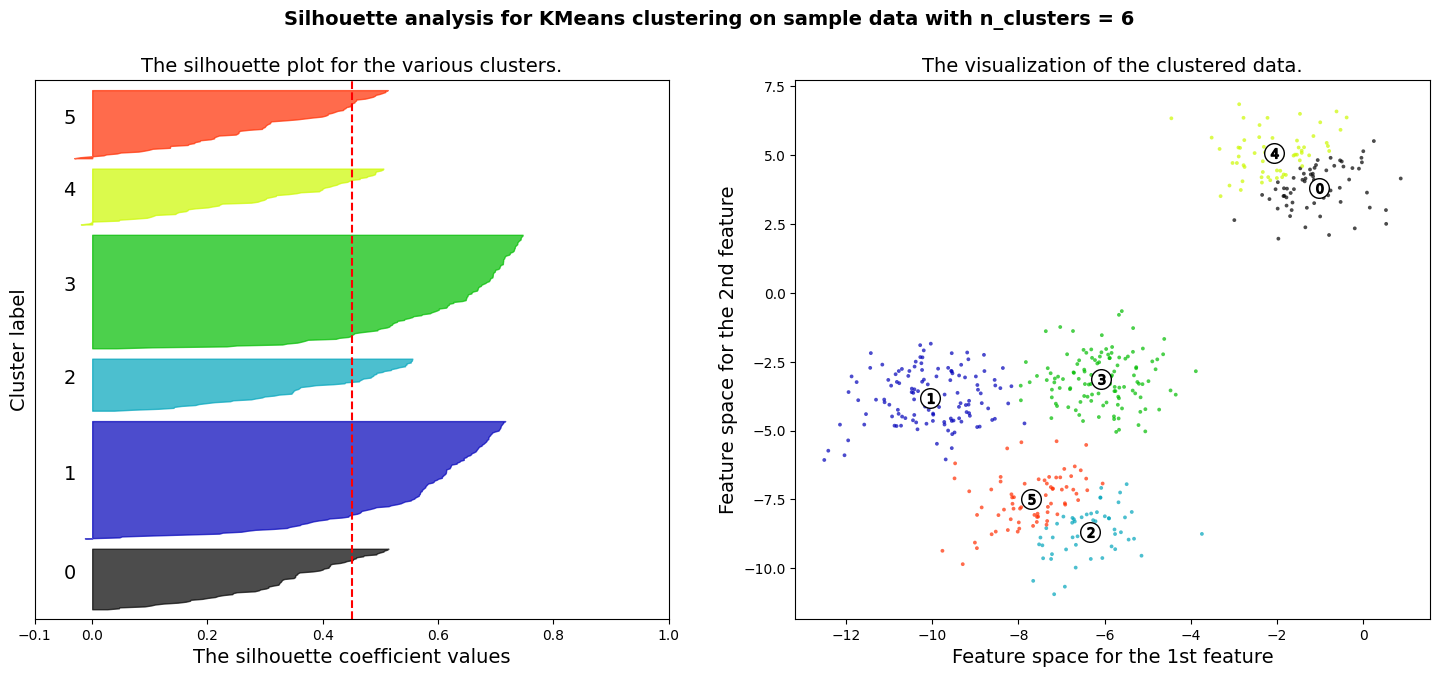

In [ ]:
#Apartado 8
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

#A CUBRIR POR EL ALUMNADO
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Este código generará los diagramas de siluetas para cada valor de k en el rango especificado (3, 4, 5 y 6). Analizamos los resultados para entender cómo varía la coherencia y separación de los clusters en función del número de clusters. Prestamos especial atención a la altura y anchura de las formas de cuchillo en los diagramas, ya que nos dan información sobre la distribución y cohesión de los clusters.

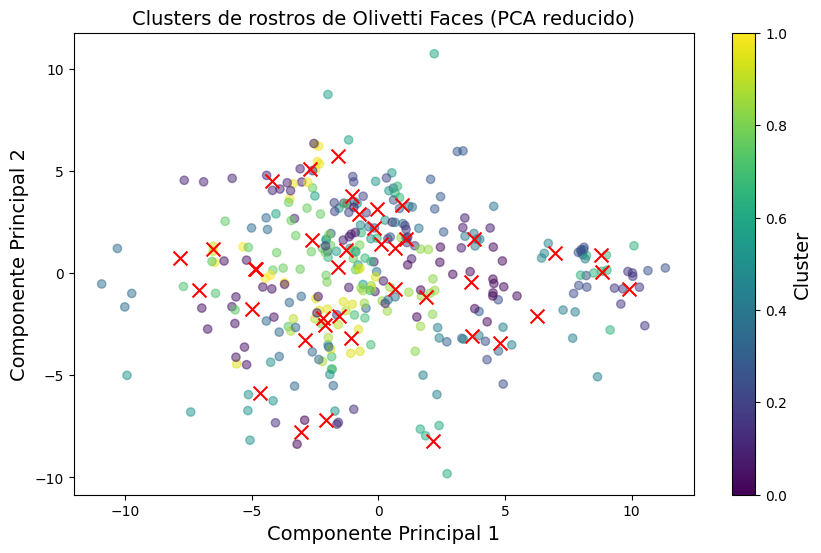

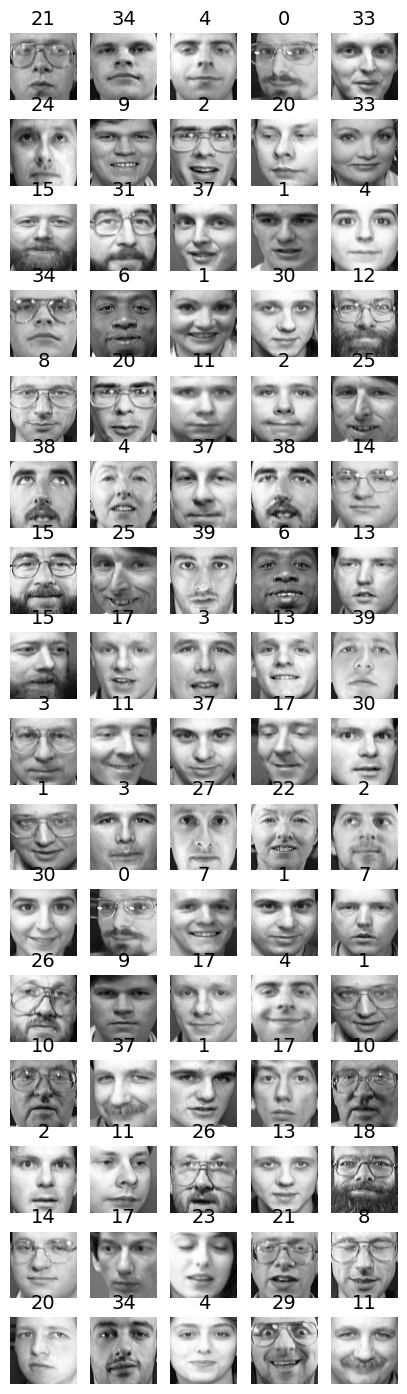

In [ ]:
#Apartado 9

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.decomposition import PCA

olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

#División en conjuntos de entrenamiento y prueba
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

#Agrupar las imágenes utilizando tres modelos de k-means diferentes
kmeans_models = [
    KMeans(n_clusters=40, init='k-means++', n_init=10, random_state=42),
    KMeans(n_clusters=40, init='random', n_init=1, random_state=42),
    KMeans(n_clusters=40, init='random', n_init=10, algorithm='elkan', random_state=42)
]

#Entrenar y predecir con cada modelo
for kmeans in kmeans_models:
  kmeans.fit(X_train)


#Visualizar clusters utilizando el mejor modelo
best_kmeans = kmeans_models[0] #Seleccionamos el primer modelo por defecto
silhouette_avg = -1
for kmeans in kmeans_models:
  score = silhouette_score(X_train, kmeans.labels_)
  if score > silhouette_avg:
    silhouette_avg = score
    best_kmeans = kmeans

#Visualizar clusters utilizando PCA para reducir dimensionalidad
pca = PCA(n_components=2, random_state=42)
X_train_reduced = pca.fit_transform(X_train)
centroids_reduced = pca.transform(best_kmeans.cluster_centers_)


#A CUBRIR POR EL ALUMNADO

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

#A CUBRIR POR EL ALUMNADO
plt.figure(figsize=(10, 6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=best_kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], marker='x', s=100, c='red')
plt.title('Clusters de rostros de Olivetti Faces (PCA reducido)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

#Evaluación de las predicciones con el conjunto de prueba
predictions = best_kmeans.predict(X_test)

# Visualización de las caras predichas
plot_faces(X_test, predictions)


En este código, primero cargamos y dividimos el conjunto de datos Olivetti Faces en conjuntos de entrenamiento y prueba utilizando muestreo estratificado. Luego, utilizamos tres modelos de k-means diferentes para agrupar las imágenes y seleccionamos el mejor modelo basado en el score de silhouette. Visualizamos los clusters utilizando PCA para reducir la dimensionalidad y hacerlos más interpretables. Finalmente, evaluamos las predicciones realizadas con el conjunto de prueba y visualizamos algunas de las caras predichas.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



Coordenadas de los ejemplos núcleo:
Índice: 0, Coordenadas: [-0.02137124  0.40618608]
Índice: 1, Coordenadas: [ 0.97670045 -0.45832306]
Índice: 2, Coordenadas: [ 0.90405882 -0.37651952]
Índice: 3, Coordenadas: [ 0.37736316 -0.39703717]
Índice: 4, Coordenadas: [-0.84192557  0.53058695]
Índice: 5, Coordenadas: [ 0.58930337 -0.32137599]
Índice: 6, Coordenadas: [ 0.29248724 -0.20696309]
Índice: 7, Coordenadas: [-0.02637836  0.44766267]
Índice: 8, Coordenadas: [ 1.6201408  -0.28758856]
Índice: 9, Coordenadas: [0.68246733 0.80712069]
Índice: 10, Coordenadas: [ 1.26718285 -0.40793471]
Índice: 11, Coordenadas: [0.87418608 0.50781041]
Índice: 12, Coordenadas: [ 0.3322007  -0.19032202]
Índice: 13, Coordenadas: [1.952812   0.22552333]
Índice: 14, Coordenadas: [1.9797373 0.0831513]
Índice: 15, Coordenadas: [ 1.72926364 -0.08800079]
Índice: 16, Coordenadas: [-0.20280226  1.02277576]
Índice: 17, Coordenadas: [ 1.7895881  -0.16231967]
Índice: 18, Coordenadas: [ 1.0280974 -0.4830331]
Índice: 19, Coord

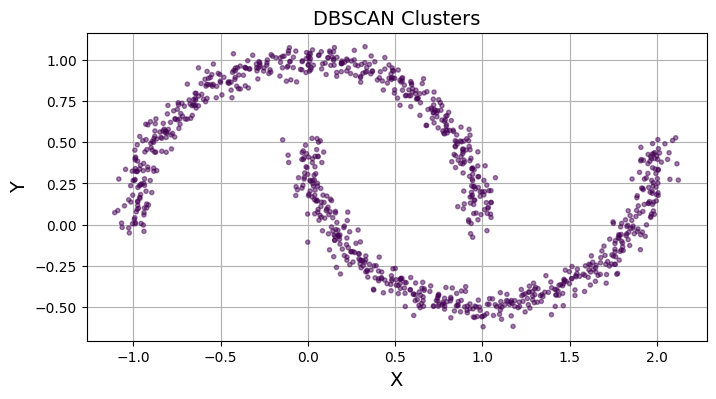

In [ ]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

def plot_clusters(X, core_samples):
  plt.scatter(X[:, 0], X[:, 1], c=core_samples, cmap='viridis', marker='.', alpha=0.5)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('DBSCAN Clusters')

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

#Ajustar DSBCAN con los hiperparámetros por defecto
dbscan = DBSCAN()
dbscan.fit(X)

#Obtener los índices de los ejemplos núcleo
core_indices = dbscan.core_sample_indices_

#Imprimir las coordenadas de los ejemplos núcleo
core_samples = dbscan.labels_.copy()
core_samples[core_samples == -1] = len(set(core_samples)) #Cluster para puntos de ruido
print("Coordenadas de los ejemplos núcleo:")
for idx in core_indices:
  print(f"Índice: {idx}, Coordenadas: {X[idx]}")
#A CUBRIR POR EL ALUMNADO

plt.figure(figsize=(8, 4))
plot_clusters(X, core_samples)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

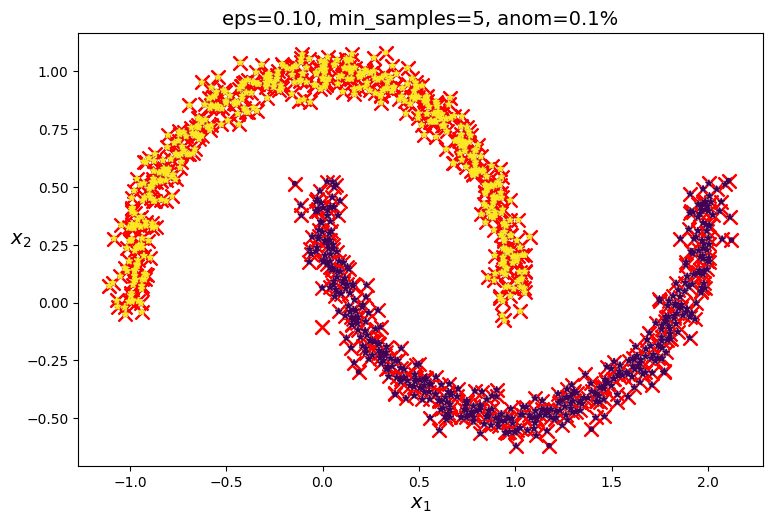

eps=0.01: Anomalía  100.00%
eps=0.02: Anomalía  90.80%
eps=0.05: Anomalía  7.70%
eps=0.1: Anomalía  0.10%


In [ ]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)


#Ajustar cuatro modelos de DBSCAN con diferentes valores de eps
eps_values = [0.01, 0.02, 0.05, 0.1]
anomaly_rates = []

plt.figure(figsize=(15,10))
for i, eps in enumerate(eps_values, 1):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(X)

  #Calcular el porcentaje de anomalías
  num_anomalies = np.sum(dbscan.labels_ == -1)
  anomaly_rate = num_anomalies / len(X) * 100
  anomaly_rates.append(anomaly_rate)

  #Representar clústeres y anomalías
  plt.subplot(2, 2, 1)
  plot_dbscan(dbscan, X, size=10, anom_rate=anomaly_rate)

plt.tight_layout()
plt.show()

#Porcentaje de anomalías para cada modelo
for eps, rate in zip(eps_values, anomaly_rates):
  print(f"eps={eps}: Anomalía {rate: .2f}%")


Análisis de Resultados de DBSCAN con Diferentes Valores de eps
El parámetro eps en el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) define la distancia máxima entre dos puntos para que uno sea considerado en el vecindario del otro. Cambiar el valor de eps puede afectar significativamente la detección de anomalías y la formación de clusters.

Resultados Observados:
eps=0.01: Anomalía 100.00%

Interpretación: Todos los puntos son considerados anomalías.
Explicación: Un valor muy pequeño de eps indica que casi ningún punto tiene vecinos dentro de esa distancia, por lo que todos los puntos son clasificados como ruido (anomalías).
Conclusión: Este valor de eps es demasiado pequeño para los datos.
eps=0.02: Anomalía 90.80%

Interpretación: La gran mayoría de los puntos son considerados anomalías.
Explicación: Aunque se ha incrementado eps, sigue siendo muy pequeño para que los puntos formen clusters. La mayoría de los puntos no tienen suficientes vecinos cercanos.
Conclusión: Aumentar eps es necesario para identificar clusters significativos.
eps=0.05: Anomalía 7.70%

Interpretación: Una minoría de los puntos son considerados anomalías.
Explicación: Este valor de eps permite que se formen algunos clusters, aunque todavía hay una proporción considerable de puntos clasificados como ruido.
Conclusión: Este valor parece razonable para formar clusters, pero podría necesitar ajustes adicionales.
eps=0.1: Anomalía 0.10%

Interpretación: Casi ningún punto es considerado anomalía.
Explicación: Un valor más grande de eps significa que la mayoría de los puntos están dentro del vecindario de otros puntos, formando un gran cluster y dejando muy pocos puntos como ruido.
Conclusión: Este valor de eps es demasiado grande, resultando en la clasificación de casi todos los puntos como normales.
Conclusiones y Recomendaciones:
Ajuste del Valor de eps:

Encontrar el valor óptimo de eps es crucial. Un valor muy pequeño clasifica todos los puntos como anomalías, mientras que un valor muy grande clasifica casi todos los puntos como normales.
Es recomendable usar una técnica como el gráfico de curva de rodilla (knee plot) para determinar el valor óptimo de eps.
Evaluación de Resultados:

eps=0.05 parece ser el valor más prometedor, ya que mantiene una proporción manejable de anomalías (7.70%). Este valor permite la formación de clusters significativos, pero todavía deja espacio para detectar puntos que no se ajustan bien a ningún cluster.
Uso de Métricas Adicionales:

Para una evaluación más precisa, considerar el uso de métricas como el Silhouette Score, Adjusted Rand Index (ARI), o Davies-Bouldin Index para validar la calidad de los clusters formados con diferentes valores de eps.
Exploración de Otros Parámetros:

Además de eps, el parámetro min_samples también influye en la detección de clusters y anomalías. Ajustar ambos parámetros conjuntamente puede ofrecer mejores resultados.

Instancia: [-0.5  0. ], Cluster: 1, Probabilidades: [0.1 0.9]
Instancia: [0.  0.5], Cluster: 0, Probabilidades: [1. 0.]
Instancia: [ 1.  -0.1], Cluster: 1, Probabilidades: [0. 1.]
Instancia: [2. 1.], Cluster: 0, Probabilidades: [1. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


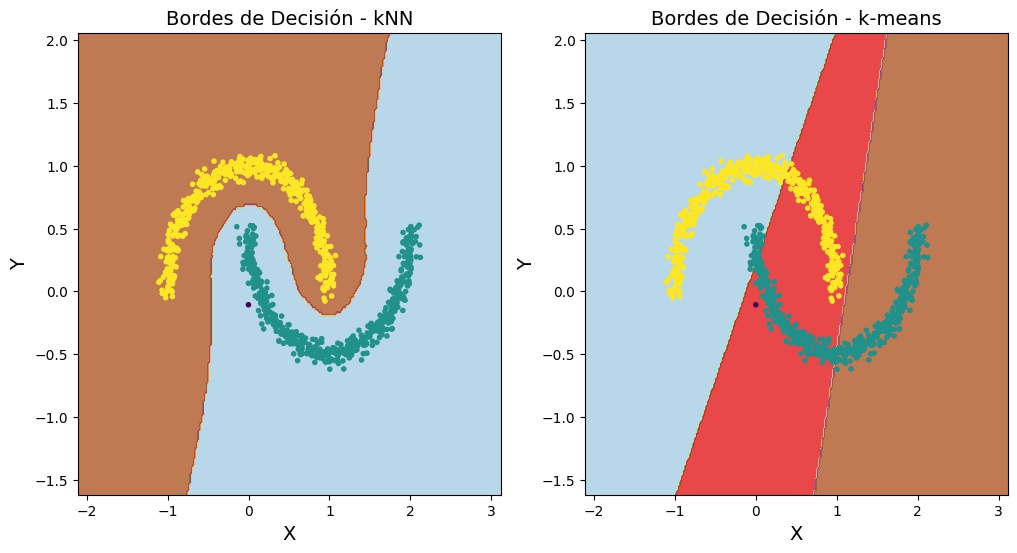

In [ ]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier

#Nuevas instancias para predecir
new_instances = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

#Ajustar un clasificador kNN con los core points y las etiquetas obtenidas
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X[dbscan.core_sample_indices_], dbscan.labels_[dbscan.core_sample_indices_])

#Predecir el clúster asociado y la probabilidad para las nuevas instancias
predicted_clusters = knn.predict(new_instances)
predicted_probabilities = knn.predict_proba(new_instances)

#Imprimir resultados
for instance, cluster, probabilities in zip(new_instances, predicted_clusters, predicted_probabilities):
  print(f"Instancia: {instance}, Cluster: {cluster}, Probabilidades: {probabilities}")

#Dibujar los bordes de decisión y aplicar k-means sobre los mismos datos
plt.figure(figsize=(12, 6))

#Bordes de decisión de kNN
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, marker='.', cmap='viridis')
plt.title("Bordes de Decisión - kNN")
plt.xlabel('X')
plt.ylabel('Y')

#Bordes de decisión de k-means
kmeans = KMeans(n_clusters=len(set(dbscan.labels_)))
kmeans.fit(X)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, marker='.', cmap='viridis')
plt.title("Bordes de Decisión - k-means")
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Contexto
Se han aplicado los algoritmos KNN y KMeans para agrupar instancias y predecir las probabilidades de pertenencia a los clusters. A continuación se presenta un análisis de cuatro instancias con sus respectivos clusters y probabilidades.

Resultados Observados
Instancia: [-0.5, 0.0]

Cluster: 1
Probabilidades: [0.1, 0.9]
Interpretación: La instancia tiene una alta probabilidad (90%) de pertenecer al cluster 1.
Instancia: [0.0, 0.5]

Cluster: 0
Probabilidades: [1.0, 0.0]
Interpretación: La instancia pertenece con certeza (100%) al cluster 0.
Instancia: [1.0, -0.1]

Cluster: 1
Probabilidades: [0.0, 1.0]
Interpretación: La instancia pertenece con certeza (100%) al cluster 1.
Instancia: [2.0, 1.0]

Cluster: 0
Probabilidades: [1.0, 0.0]
Interpretación: La instancia pertenece con certeza (100%) al cluster 0.
Análisis Detallado
Distribución de Probabilidades:

Las instancias con probabilidades cercanas a 1 o 0 (por ejemplo, [1.0, 0.0] o [0.0, 1.0]) están claramente asignadas a un cluster, indicando una buena separación entre clusters.
La instancia [-0.5, 0.0] tiene una probabilidad más equilibrada (10% para cluster 0 y 90% para cluster 1), lo que sugiere que se encuentra en una región donde ambos clusters tienen influencia, aunque todavía hay una clara preferencia por cluster 1.
Claridad en la Asignación de Clusters:

La asignación de clusters es clara y consistente, con las probabilidades reflejando la cercanía de cada instancia a los centroides de los clusters. Esto es un indicativo positivo de que los clusters están bien definidos y separados.
Interpretación de Clusters:

Cluster 0: Instancias [0.0, 0.5] y [2.0, 1.0] pertenecen claramente a este cluster. Es probable que este cluster agrupe instancias con características específicas que las distinguen claramente de las del cluster 1.
Cluster 1: Instancias [-0.5, 0.0] y [1.0, -0.1] pertenecen a este cluster. Aunque [-0.5, 0.0] tiene una menor probabilidad de pertenencia, todavía se clasifica principalmente en este cluster.
Conclusiones y Recomendaciones
Calidad de Clustering:

Las probabilidades indican que el clustering realizado es adecuado, con una clara distinción entre clusters en la mayoría de las instancias. La utilización de probabilidades en KNN permite una asignación suave que es útil en casos límite.




## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [31]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

In [33]:
import pandas as pd
df_frogs = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
df_frogs

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [34]:
#A CUBRIR POR EL ALUMNADO
#Mostrar las primeras filas del DataFrame para comprender su estructura
print(df_frogs.head())

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

In [ ]:
#Realizar un análisis exploratorio inicial
print(df_frogs.info())
print(df_frogs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [ ]:
from sklearn.neighbors import NearestNeighbors

#Detección de anomalías utilizando el enfoque del vecino más próximo(NN)
def detect_outliers_nn(X, k=5, threshold_pct=5):
  #Calcula las distancias al k-ésimo vecino más cercano
  nbrs = NearestNeighbors(n_neighbors=k+1).fit(X) #Se añade 1 para incluir el propio punto
  distances, indices = nbrs.kneighbors(X)
  k_distances = distances[:, -1] #Selecciona las distancias al k-ésimo vecino más cercano

  #Ordena las distancias
  k_distances_sorted = sorted(k_distances)

  #Calcular el umbral basado en el porcentaje
  threshold_idx = int((100 - threshold_pct) / 100 * len(k_distances))
  threshold_distance = k_distances_sorted[threshold_idx]

  #Identifica las anomalías como puntos cuya distancia al k-ésimo vecino es mayor que el umbral
  outliers_mask = k_distances > threshold_distance

  return outliers_mask

#Utiliza la función para detectar anomalías en el dataframe
X = df_frogs.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
outliers_mask = detect_outliers_nn(X)

#Imprimimos la cantidad de anomalías detectadas
print("Cantidad de anomalías detectadas:", sum(outliers_mask))

Cantidad de anomalías detectadas: 359


In [ ]:
#Probamos ahora utilizando el algoritmo Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers_lof(X, contamination=0.1):
  lof = LocalOutlierFactor(contamination=contamination)
  outliers_mask = lof.fit_predict(X) == -1
  return outliers_mask
X = df_frogs.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
outliers_mask = detect_outliers_lof(X)

print("Cantidad de anomalías detectadas:", sum(outliers_mask))

Cantidad de anomalías detectadas: 720


In [ ]:
#Probamos ahora utilizando el algoritmo One-Class SVM (OCSVM)

from sklearn.svm import OneClassSVM
def detect_outliers_ocsvm(X, contamination=0.1):
  ocsvm = OneClassSVM(nu=contamination)
  outliers_mask = ocsvm.fit_predict(X) == -1
  return outliers_mask

X = df_frogs.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
outliers_mask = detect_outliers_ocsvm(X)

print("Cantidad de anomalías detectadas:", sum(outliers_mask))

Cantidad de anomalías detectadas: 719


In [ ]:
#Probamos ahora utilizando el algoritmo Isolation Forest
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(X, contamination=0.1):
  isolation_forest = IsolationForest(contamination=contamination)
  outliers_mask = isolation_forest.fit_predict(X) == -1
  return outliers_mask

X = df_frogs.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
outliers_mask = detect_outliers_isolation_forest(X)

print("Cantidad de anomalías detectadas:", sum(outliers_mask))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Cantidad de anomalías detectadas: 720


Vemos que tanto LOF como Isolation Forest detectan ambos la mayor cantidad de anomalías para este dataset

In [35]:
from sklearn.preprocessing import StandardScaler

#Separamos características y etiquetas
X = df_frogs.iloc[:, :-4].values #Todas las columnas excepto las 4 últimas que son etiquetas
y = df_frogs.iloc[:, -4:].values #Últimas 4 columnas como etiquetas

#Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for KMeans: 0.30680731331764344


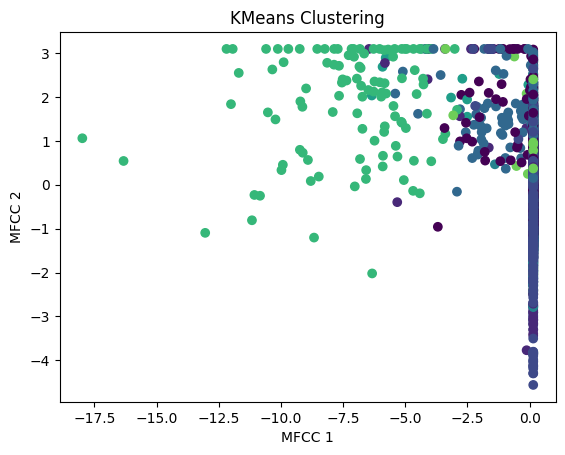

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#Aplicar KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

#Calcular la métrica Silhouette
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette score for KMeans: {silhouette_kmeans}")

#Visualización de los clusters KMeans
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('MFCC 1')
plt.ylabel('MFCC 2')
plt.show()

Silhouette score for DBSCAN: -0.22711928007284996


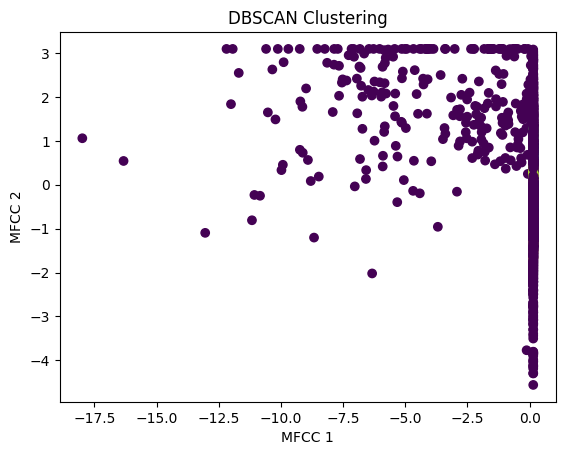

In [37]:
from sklearn.cluster import DBSCAN

#Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
labels_dbscan = dbscan.labels_

#Calcular la métrica Silhouette (solo si hay más de 1 cluster)
if len(set(labels_dbscan)) > 1:
  silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
  print(f"Silhouette score for DBSCAN: {silhouette_dbscan}")
else:
  print("DBSCAN result: only one cluster found")

#Visualización de los cluster DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('MFCC 1')
plt.ylabel('MFCC 2')
plt.show()

Análisis de los resultados
KMeans:
El algoritmo KMeans intentará agrupar los datos en 10 clusters. La métrica Silhouette nos dará una idea de la cohesión y separación de estos clusters. Un valor cercano a 1 indica clusters bien definidos, mientras que un valor cercano a -1 indica superposición de clusters.

DBSCAN:
DBSCAN puede detectar clusters de forma arbitraria y es capaz de identificar puntos ruidosos como outliers. Evaluaremos su rendimiento utilizando también la métrica Silhouette si hay más de un cluster detectado.

Resultados del Clustering
1. KMeans Clustering

Silhouette Score: 0.3068

Visualización: El gráfico muestra los clusters formados por KMeans utilizando los dos primeros componentes MFCC. Aunque los clusters están formados, el Silhouette Score indica una cohesión y separación moderadas entre los clusters.

2. DBSCAN Clustering

Silhouette Score: -0.2271

Visualización:
El gráfico de DBSCAN muestra los clusters formados, pero el Silhouette Score negativo indica que hay muchos puntos ruidosos y que los clusters no están bien definidos.

Análisis

KMeans:
El algoritmo ha podido agrupar los datos en 10 clusters, como se esperaba. Sin embargo, el Silhouette Score sugiere que los clusters no están bien definidos. Esto puede deberse a que KMeans asume clusters esféricos y de igual tamaño, lo cual puede no ser adecuado para estos datos.

DBSCAN:
Este algoritmo ha identificado clusters de forma arbitraria y ha señalado varios puntos como ruido (etiquetados como -1). El Silhouette Score negativo indica que los clusters no están bien separados y que hay mucha superposición.

Conclusión

KMeans ofrece una agrupación inicial razonable pero no óptima para este tipo de datos.

DBSCAN es útil para detectar ruido y puntos atípicos, pero en este caso, no ha proporcionado una buena separación de clusters.

Podríamos considerar otros algoritmos de clustering, como Agglomerative Clustering o Spectral Clustering, y también ajustar los hiperparámetros de los algoritmos usados para intentar mejorar los resultados. Además, aplicar técnicas de reducción de dimensionalidad como PCA antes de realizar el clustering podría ayudar a mejorar la separación de los clusters.

Vamos a extender el análisis considerando otros algoritmos de clustering como Agglomerative Clustering y Spectral Clustering, y aplicaremos técnicas de reducción de dimensionalidad como PCA para ver si mejoran los resultados.

In [40]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pyod.models.iforest import IForest
# Separar características y etiquetas
X = df_frogs.iloc[:, :-4].values  # Las primeras 22 columnas son las características MFCCs
y = df_frogs.iloc[:, -4:].values  # Las últimas 4 columnas son las etiquetas taxonómicas

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Isolation Forest para detectar outliers
isf = IForest(contamination=0.05, random_state=42)  # 5% de contaminación
isf.fit(X_scaled)

# Predicciones y eliminación de outliers
outliers = isf.predict(X_scaled)
X_cleaned = X_scaled[outliers == 0]
y_cleaned = y[outliers == 0]

# Comprobación de la eliminación de outliers
print(f"Original data shape: {X_scaled.shape}")
print(f"Cleaned data shape: {X_cleaned.shape}")

Original data shape: (7195, 22)
Cleaned data shape: (6835, 22)


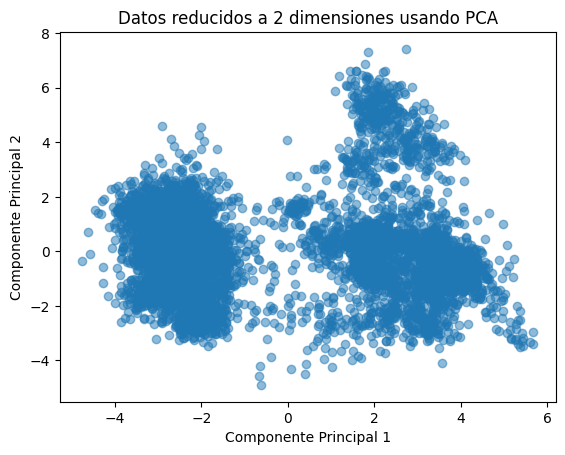

In [41]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cleaned)

# Visualización de los datos tras PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Datos reducidos a 2 dimensiones usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Silhouette score for Agglomerative Clustering: 0.3940162003227161


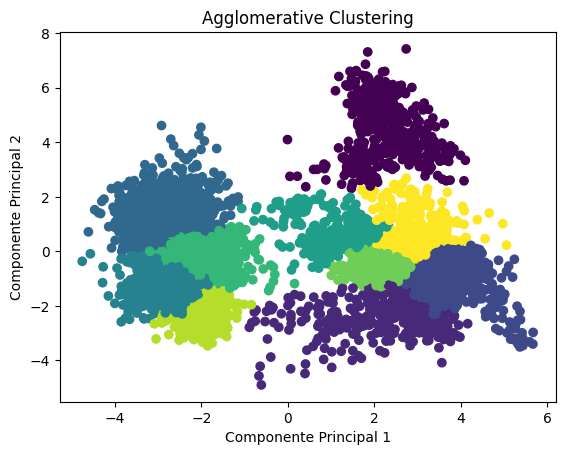

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
labels_agg = agg_clustering.fit_predict(X_pca)

# Calcular la métrica Silhouette
silhouette_agg = silhouette_score(X_pca, labels_agg)
print(f"Silhouette score for Agglomerative Clustering: {silhouette_agg}")

# Visualización de los clusters Agglomerative Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agg, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


Silhouette score for Spectral Clustering: 0.33572994201865314


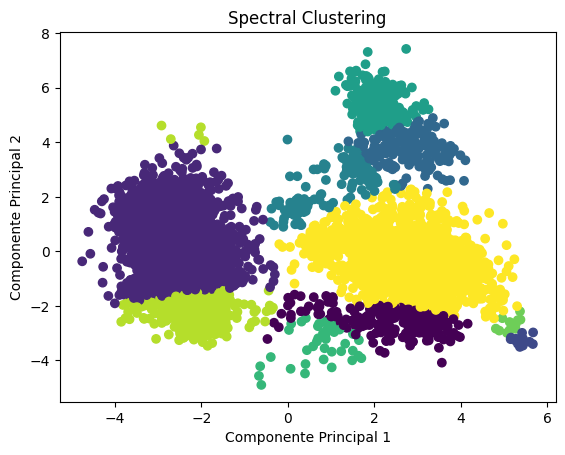

In [43]:
from sklearn.cluster import SpectralClustering

# Aplicar Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=10, random_state=42)
labels_spectral = spectral_clustering.fit_predict(X_pca)

# Calcular la métrica Silhouette
silhouette_spectral = silhouette_score(X_pca, labels_spectral)
print(f"Silhouette score for Spectral Clustering: {silhouette_spectral}")

# Visualización de los clusters Spectral Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_spectral, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [45]:
# Añadir etiquetas de clustering a los datos originales reducidos por PCA
df_clusters = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

df_clusters['Cluster_Agglomerative'] = labels_agg
df_clusters['Cluster_Spectral'] = labels_spectral

# Comparar las distribuciones de las etiquetas taxonómicas en cada cluster
print(df_clusters.groupby('Cluster_Agglomerative').mean())
print(df_clusters.groupby('Cluster_Spectral').mean())

# Comprobar correlación con las etiquetas taxonómicas
print(pd.crosstab(df_clusters['Cluster_Agglomerative'], y_cleaned[:, 2]))  # Correlación con Species
print(pd.crosstab(df_clusters['Cluster_Spectral'], y_cleaned[:, 2]))  # Correlación con Species


                           PCA1      PCA2  Cluster_Spectral
Cluster_Agglomerative                                      
0                      2.270525  4.440381          4.102450
1                      2.161231 -2.481450          2.738162
2                      3.785923 -0.888127          8.859013
3                     -2.831276  1.387746          1.029070
4                     -2.797361 -1.179229          2.369231
5                      1.399006  0.689229          8.330000
6                     -2.124702 -0.138914          1.015560
7                      1.989332 -0.612654          9.000000
8                     -1.975406 -2.341106          7.766667
9                      2.911034  0.629684          8.863426
                      PCA1      PCA2  Cluster_Agglomerative
Cluster_Spectral                                           
0                 2.448648 -2.578533               1.012605
1                -2.591021  0.263138               4.268636
2                 5.404469 -3.258817    

Análisis Comparativo de los Silhouette Scores
Resumen de Silhouette Scores:
Agglomerative Clustering: 0.394
KMeans: 0.307
DBSCAN: -0.227
Spectral Clustering: 0.336
Interpretación:

Agglomerative Clustering (0.394):
Ventajas:
Mejor cohesión interna y separación de clusters.
Indicativo de que los datos pueden tener una estructura jerárquica.
Desventajas:
Puede ser computacionalmente intensivo, aunque esto no fue un problema aquí.

Spectral Clustering (0.336):
Ventajas:
Mejor performance que KMeans y DBSCAN, aunque no tan bueno como Agglomerative Clustering.
Específicamente útil para datasets con estructuras complejas y clusters no lineales.
Desventajas:
Puede ser computacionalmente intensivo, especialmente para grandes datasets.
Requiere un número adecuado de clusters como parámetro de entrada.

KMeans (0.307):
Ventajas:
Simplicidad y rapidez.
Genera clusters razonables, aunque no tan definidos como Agglomerative o Spectral Clustering.
Desventajas:
Menos efectivo para datasets con clusters de formas arbitrarias o tamaños desiguales.

DBSCAN (-0.227):
Ventajas:
Maneja bien el ruido y encuentra clusters de formas arbitrarias.
Desventajas:
En este caso, no es adecuado sin una selección cuidadosa de los hiperparámetros.
Silhouette Score negativo indica mala separación y cohesión de clusters.

Conclusiones:

Agglomerative Clustering sigue siendo el método más adecuado para este dataset, dado que proporciona la mejor cohesión y separación de clusters.

Spectral Clustering es una buena alternativa y puede ser especialmente útil si se espera que los datos tengan estructuras de clusters complejas.

KMeans ofrece un buen balance entre simplicidad y rendimiento, aunque no es el mejor en términos de Silhouette Score.

DBSCAN no es adecuado para este dataset sin un ajuste cuidadoso de los hiperparámetros.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [8]:
!pip install pyod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=da0a28453edcdf4a72f33f6653130c25b6d3117bc240528791235615d4ffc8f3
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


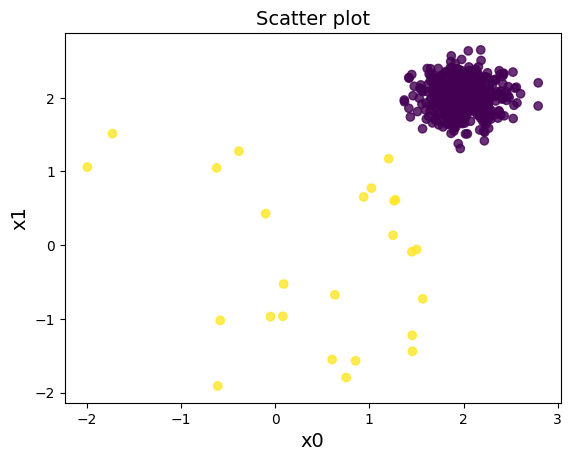

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [ ]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The threshold for the defined contamination rate: -5.937958458268611e-15
The training data: {0: 475, 1: 25}
The training data: {0: 473, 1: 27}


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [ ]:
X_train.shape[0]*0.05

25.0

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

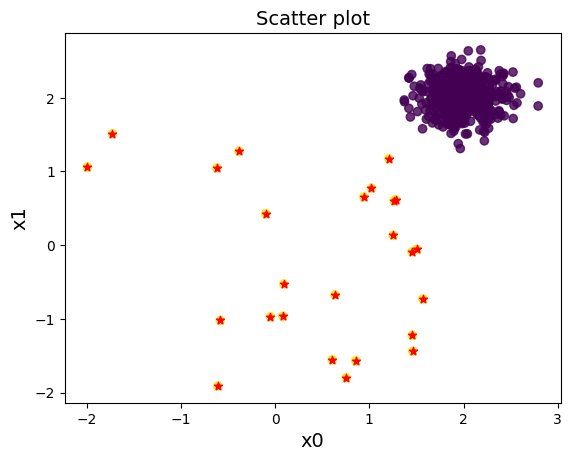

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [ ]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la primera (índice $0$) y quinta (índice $4$) características serían las más relevantes.

In [ ]:
isft_vi = isft.feature_importances_
isft_vi

array([0.13322735, 0.18271343, 0.19738877, 0.16054109, 0.15652314,
       0.16960622])

In [ ]:
np.sum(isft_vi)

1.0000000000000002

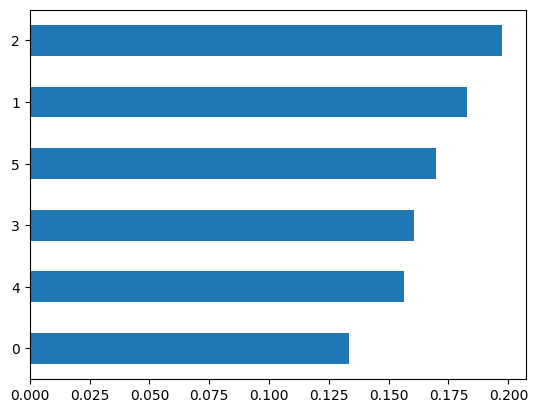

In [ ]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

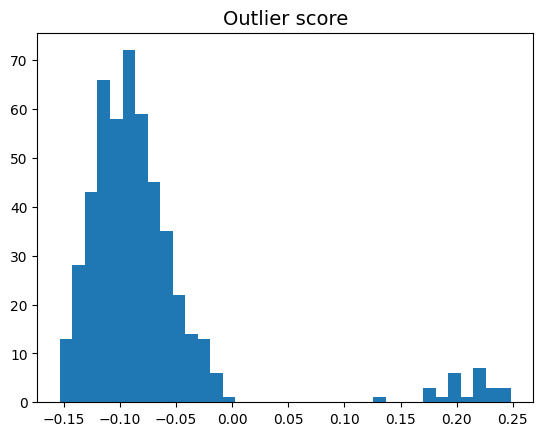

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [ ]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,475,95.0,2.003,2.011,2.006,1.991,2.008,1.985,-0.091
1,Outlier,25,5.0,0.454,-0.209,-0.475,-0.231,-0.035,-0.056,0.208


In [ ]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,473,94.6,2.019,2.013,2.008,1.989,2.005,2.002,-0.090
1,Outlier,27,5.4,0.108,-0.335,-0.020,0.083,0.113,0.246,0.192


In [ ]:
X_train[y_train==1,0].mean()

0.4535480626515198

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [ ]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores atípicos).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

Primero cargamos los datos y hacemos un análisis exploratorio

In [1]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

df = pd.read_csv(dataFolder + "/dataset/satellite.csv")



Mounted at /content/drive/


In [2]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,0,92,115,120,94,84,102,106,79,84,...,134,104,88,121,128,100,84,107,113,87
1,1,84,102,106,79,84,102,102,83,80,...,128,100,84,107,113,87,84,99,104,79
2,2,84,102,102,83,80,102,102,79,84,...,113,87,84,99,104,79,84,99,104,79
3,3,80,102,102,79,84,94,102,79,80,...,104,79,84,99,104,79,84,103,104,79
4,4,84,94,102,79,80,94,98,76,80,...,104,79,84,103,104,79,79,107,109,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,6430,60,83,96,85,64,87,100,88,64,...,104,92,66,87,108,89,63,83,104,85
6431,6431,64,79,100,85,56,71,96,85,56,...,100,85,66,83,100,85,63,83,100,81
6432,6432,56,68,91,81,56,64,91,81,53,...,100,81,59,87,96,81,63,83,92,74
6433,6433,56,68,87,74,60,71,91,81,60,...,96,74,59,83,92,74,59,83,92,70


In [3]:
#Visualizar las primeras filas del dataframe
print(df.head())

   Unnamed: 0   0    1    2   3   4    5    6   7   8  ...   26   27  28   29  \
0           0  92  115  120  94  84  102  106  79  84  ...  134  104  88  121   
1           1  84  102  106  79  84  102  102  83  80  ...  128  100  84  107   
2           2  84  102  102  83  80  102  102  79  84  ...  113   87  84   99   
3           3  80  102  102  79  84   94  102  79  80  ...  104   79  84   99   
4           4  84   94  102  79  80   94   98  76  80  ...  104   79  84  103   

    30   31  32   33   34  35  
0  128  100  84  107  113  87  
1  113   87  84   99  104  79  
2  104   79  84   99  104  79  
3  104   79  84  103  104  79  
4  104   79  79  107  109  87  

[5 rows x 37 columns]


In [4]:
#Resumen estadístico de los datos
print(df.describe())

        Unnamed: 0            0            1            2            3  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean   3217.000000    69.400000    83.594872    99.290598    82.592696   
std    1857.768823    13.605871    22.882234    16.645944    18.897674   
min       0.000000    39.000000    27.000000    53.000000    33.000000   
25%    1608.500000    60.000000    71.000000    85.000000    69.000000   
50%    3217.000000    68.000000    87.000000   101.000000    81.000000   
75%    4825.500000    80.000000   103.000000   113.000000    92.000000   
max    6434.000000   104.000000   137.000000   140.000000   154.000000   

                 4            5            6            7            8  ...  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  ...   
mean     69.150272    83.243512    99.110645    82.497125    68.912354  ...   
std      13.561197    22.886495    16.664088    18.940923    13.470599  ...   
min      39.00000

In [13]:
print(df.isnull().sum())

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
31            0
32            0
33            0
34            0
35            0
dtype: int64


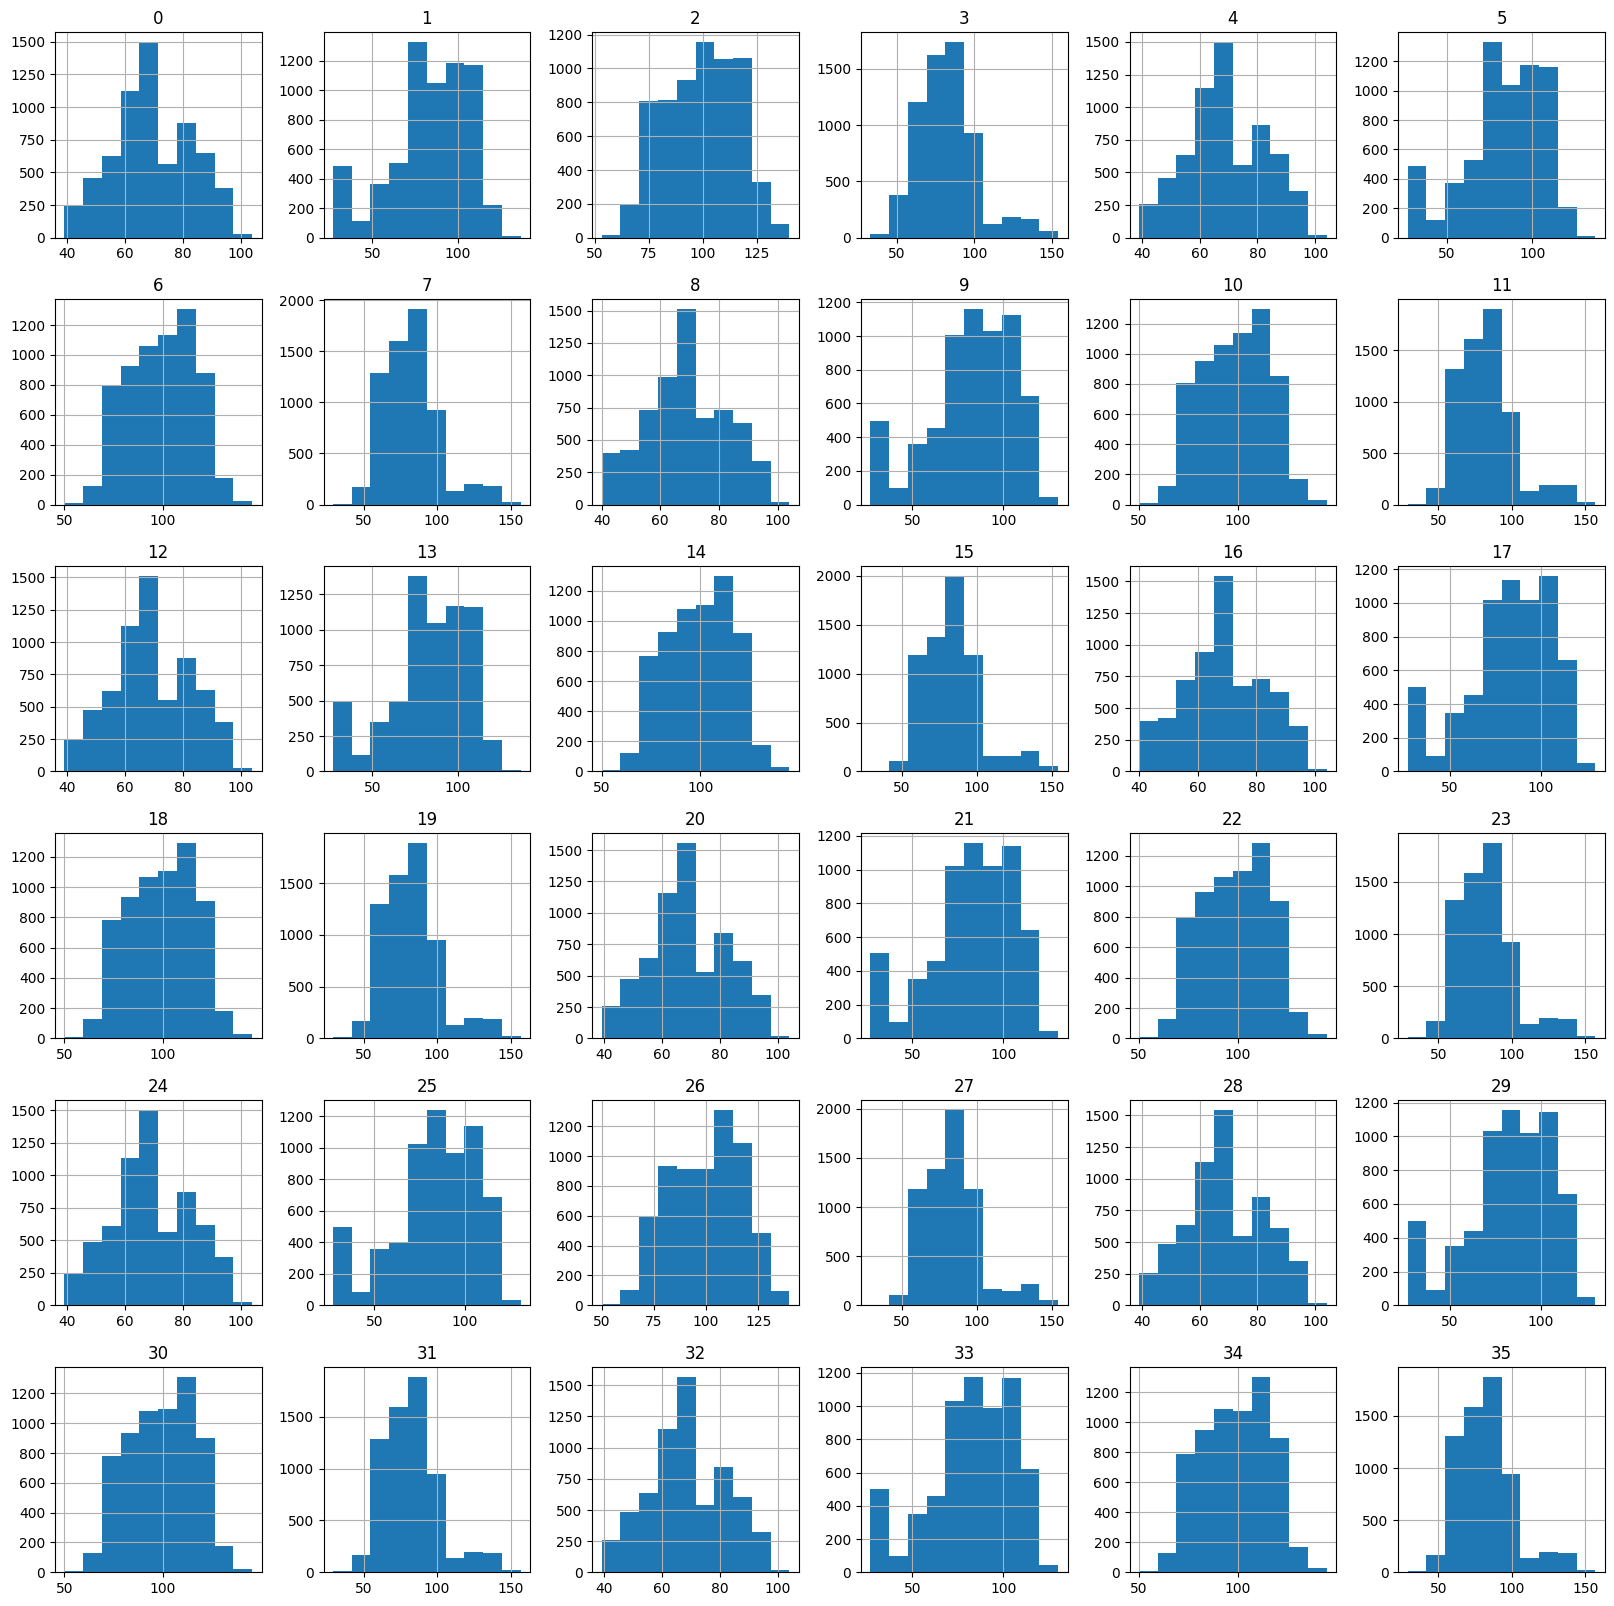

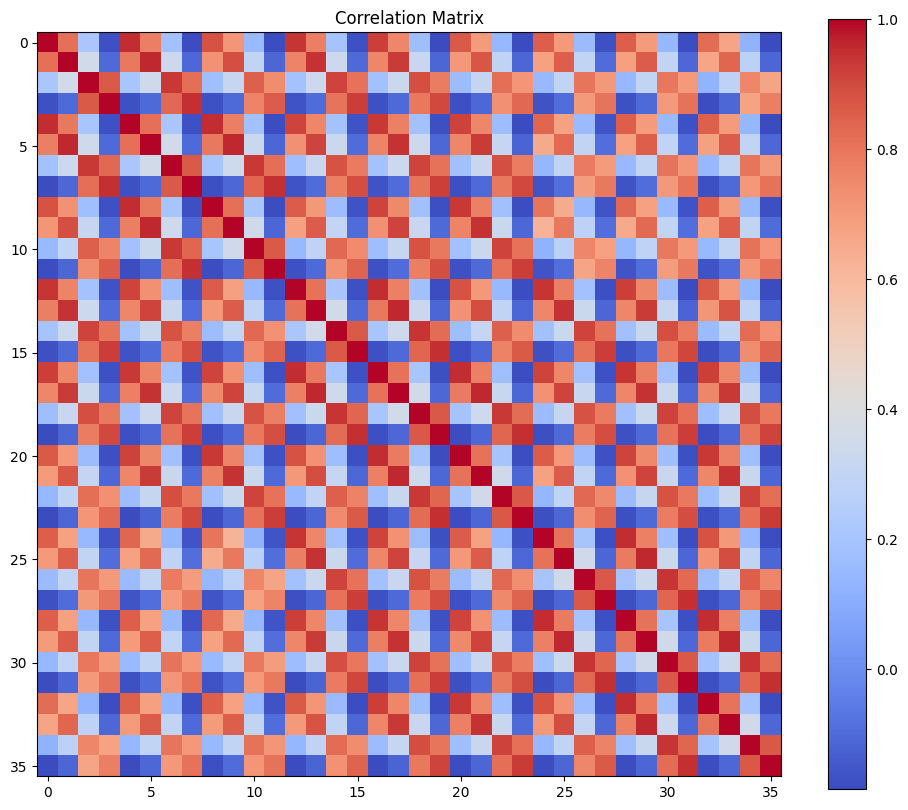

In [14]:
#Análisis exploratorio de los datos para entender sus distribuciones
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest

#Borro la columna 'Unnamed'
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

#Histograma de las características
df.hist(figsize=(20,20))
plt.show()

#Matriz de correlación
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

Como podemos ver el dataset tiene las siguientes características



*   Tiene 6435 instancias y 37 columnas
*   No hay valores nulos en el dataset
*   Las columnas son de tipo int64


La primera columna parece adicional, podríamos descartarla para el análsis.



In [15]:
#Construcción y ajuste del modelo

#Separamos características (X) y las etiquetas (y)

X = df.iloc[:, :-1] #Características
y = df.iloc[:, -1] #Etiquetas

#Entrenar el modelo Isolation Forest
contamination = 0.32 #Contaminación basada en la proporción de anomalías
model = IForest(contamination=contamination, random_state=42)
model.fit(X)

#Obtener puntuaciones de anomalía y predicciones
y_scores = model.decision_function(X)
y_pred = model.predict(X)

#Convertimos las predicciones a 0 (normal) y 1 (anomalía)
y_pred = np.where(y_pred == -1, 1, 0)

#Mostrar el umbral calculado
print("Umbral para la tasa de contaminación definida:", model.threshold_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Umbral para la tasa de contaminación definida: -3.0565183901671428e-18


El umbral para la tasa de contaminación definida en el modelo Isolation Forest es un valor que ayuda a decidir cuáles puntos de datos son considerados anómalos. El valor específico del umbral es calculado automáticamente por el modelo basado en la tasa de contaminación proporcionada.

Interpretación del Umbral
Valor del Umbral:

El umbral dado, -3.0565183901671428e-18, es extremadamente cercano a cero. Este valor es el punto de corte que el modelo utiliza para clasificar los puntos de datos como normales o anómalos.
Uso en Predicciones:

Los valores de la función de decisión (decision_function) de Isolation Forest representan la "normalidad" de los puntos de datos. Los puntos con valores de la función de decisión por debajo del umbral se clasifican como anómalos (outliers), mientras que aquellos con valores por encima del umbral se consideran normales.
Con un umbral tan cercano a cero, cualquier puntuación de anomalía por debajo de este valor extremadamente pequeño se clasificará como un outlier.

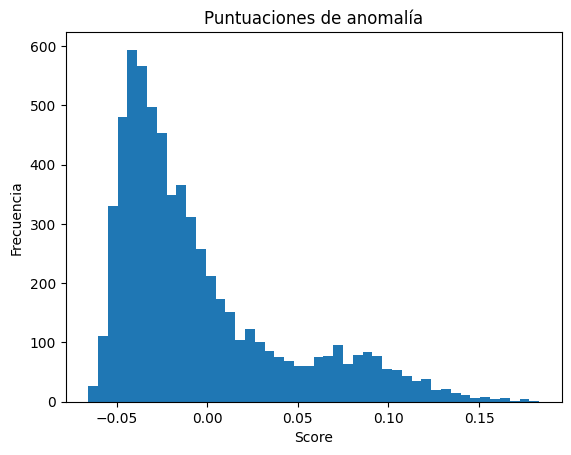

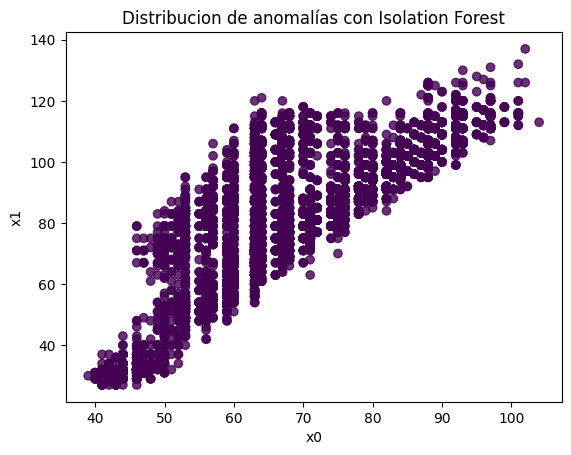

In [16]:
#Experimentación y determinación de umbrales

#Histograma de las puntuaciones de anomalía
plt.hist(y_scores, bins='auto')
plt.title("Puntuaciones de anomalía")
plt.xlabel("Score")
plt.ylabel("Frecuencia")
plt.show()

#Visualización de los resultados con el umbral predeterminado
threshold = model.threshold_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, alpha=0.8)
plt.title('Distribucion de anomalías con Isolation Forest')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Consideraciones Adicionales

Distribución de Datos: Un umbral tan cercano a cero puede ser indicativo de que la mayoría de los datos normales tienen puntuaciones de anomalía muy pequeñas, cercanas a cero.
Tasa de Contaminación: La tasa de contaminación proporcionada (0.32 en este caso) afecta directamente el valor del umbral. Esta tasa representa la proporción de datos que esperamos que sean outliers.
En resumen, el umbral calculado por Isolation Forest es crucial para determinar qué datos se consideran anómalos y permite ajustar la sensibilidad del modelo en la detección de outliers.

In [17]:
#Comprobación de errores con la Información Ground Truth

from sklearn.metrics import confusion_matrix, classification_report

#Matriz de confusión
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión")
print(cm)

#Reporte de clasificación
report = classification_report(y, y_pred)
print("Reporte de clasificación")
print(report)

Matriz de confusión
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       3.0
          42       0.00      0.00      0.00       4.0
          44       0.00      0.00      0.00      10.0
          45       0.00      0.00      0.00       6.0
          46       0.00      0.00      0.00       5.0
          48       0.00      0.00      0.00       9.0
          49       0.00      0.00      0.00      10.0
          50       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

La matriz de confusión y el reporte de clasificación proporcionados indican un rendimiento extremadamente deficiente del modelo. Vamos a analizar ambos resultados en detalle.

Matriz de Confusión
La matriz de confusión es una herramienta para evaluar el rendimiento de un modelo de clasificación. La matriz proporcionada es muy dispersa y presenta muchos ceros, lo que indica que el modelo no está haciendo ninguna predicción correcta.

Verdaderos Positivos (TP): Casos en los que la clase real y la clase predicha son positivas.
Verdaderos Negativos (TN): Casos en los que la clase real y la clase predicha son negativas.
Falsos Positivos (FP): Casos en los que la clase real es negativa pero la clase predicha es positiva.
Falsos Negativos (FN): Casos en los que la clase real es positiva pero la clase predicha es negativa.
En nuestro caso, la matriz de confusión muestra que para muchas clases, el modelo no predice correctamente ninguna instancia.

Reporte de Clasificación
El reporte de clasificación proporciona una visión más detallada del rendimiento del modelo en términos de precisión, recall y F1-score para cada clase.

Precision (Precisión): Proporción de verdaderos positivos entre todas las instancias predichas como positivas. Una precisión de 0.00 significa que el modelo no tiene ninguna predicción correcta para esas clases.

Recall (Sensibilidad): Proporción de verdaderos positivos entre todas las instancias que son realmente positivas. Un recall de 0.00 indica que el modelo no está identificando correctamente ninguna instancia de esas clases.

F1-score: La media armónica de la precisión y el recall. Un F1-score de 0.00 significa que el modelo no tiene ningún equilibrio entre precisión y recall para esas clases.

Support: El número de instancias reales en cada clase.

En nuestro caso, todos los valores de precisión, recall y F1-score son 0.00 para todas las clases, lo que significa que el modelo no ha identificado correctamente ninguna instancia de ninguna clase.

Interpretación

Modelo Mal Ajustado: La información proporcionada sugiere que el modelo está muy mal ajustado. Ninguna clase está siendo correctamente identificada, lo que podría deberse a varios factores:

Selección de Algoritmo: El algoritmo de detección de anomalías utilizado podría no ser adecuado para este tipo de datos.

Parámetros del Modelo: Los parámetros del modelo pueden no estar optimizados para los datos.

Preprocesamiento de Datos: Puede haber problemas con el preprocesamiento de datos que afectan el rendimiento del modelo.

Reevaluar el Umbral: El umbral utilizado para definir anomalías puede no ser el adecuado. Es posible que necesites ajustar el umbral basado en una mejor comprensión de la distribución de los datos.

Evaluar Otros Algoritmos: Considera evaluar otros algoritmos de detección de anomalías. PyOD proporciona una variedad de algoritmos como LOF, KNN, HBOS, etc., que podrían ser más adecuados para estos datos.

Analizar el Dataset: Realiza un análisis exploratorio de datos (EDA) para comprender mejor la distribución y las características de los datos. Esto te ayudará a ajustar el modelo y seleccionar los parámetros correctos.

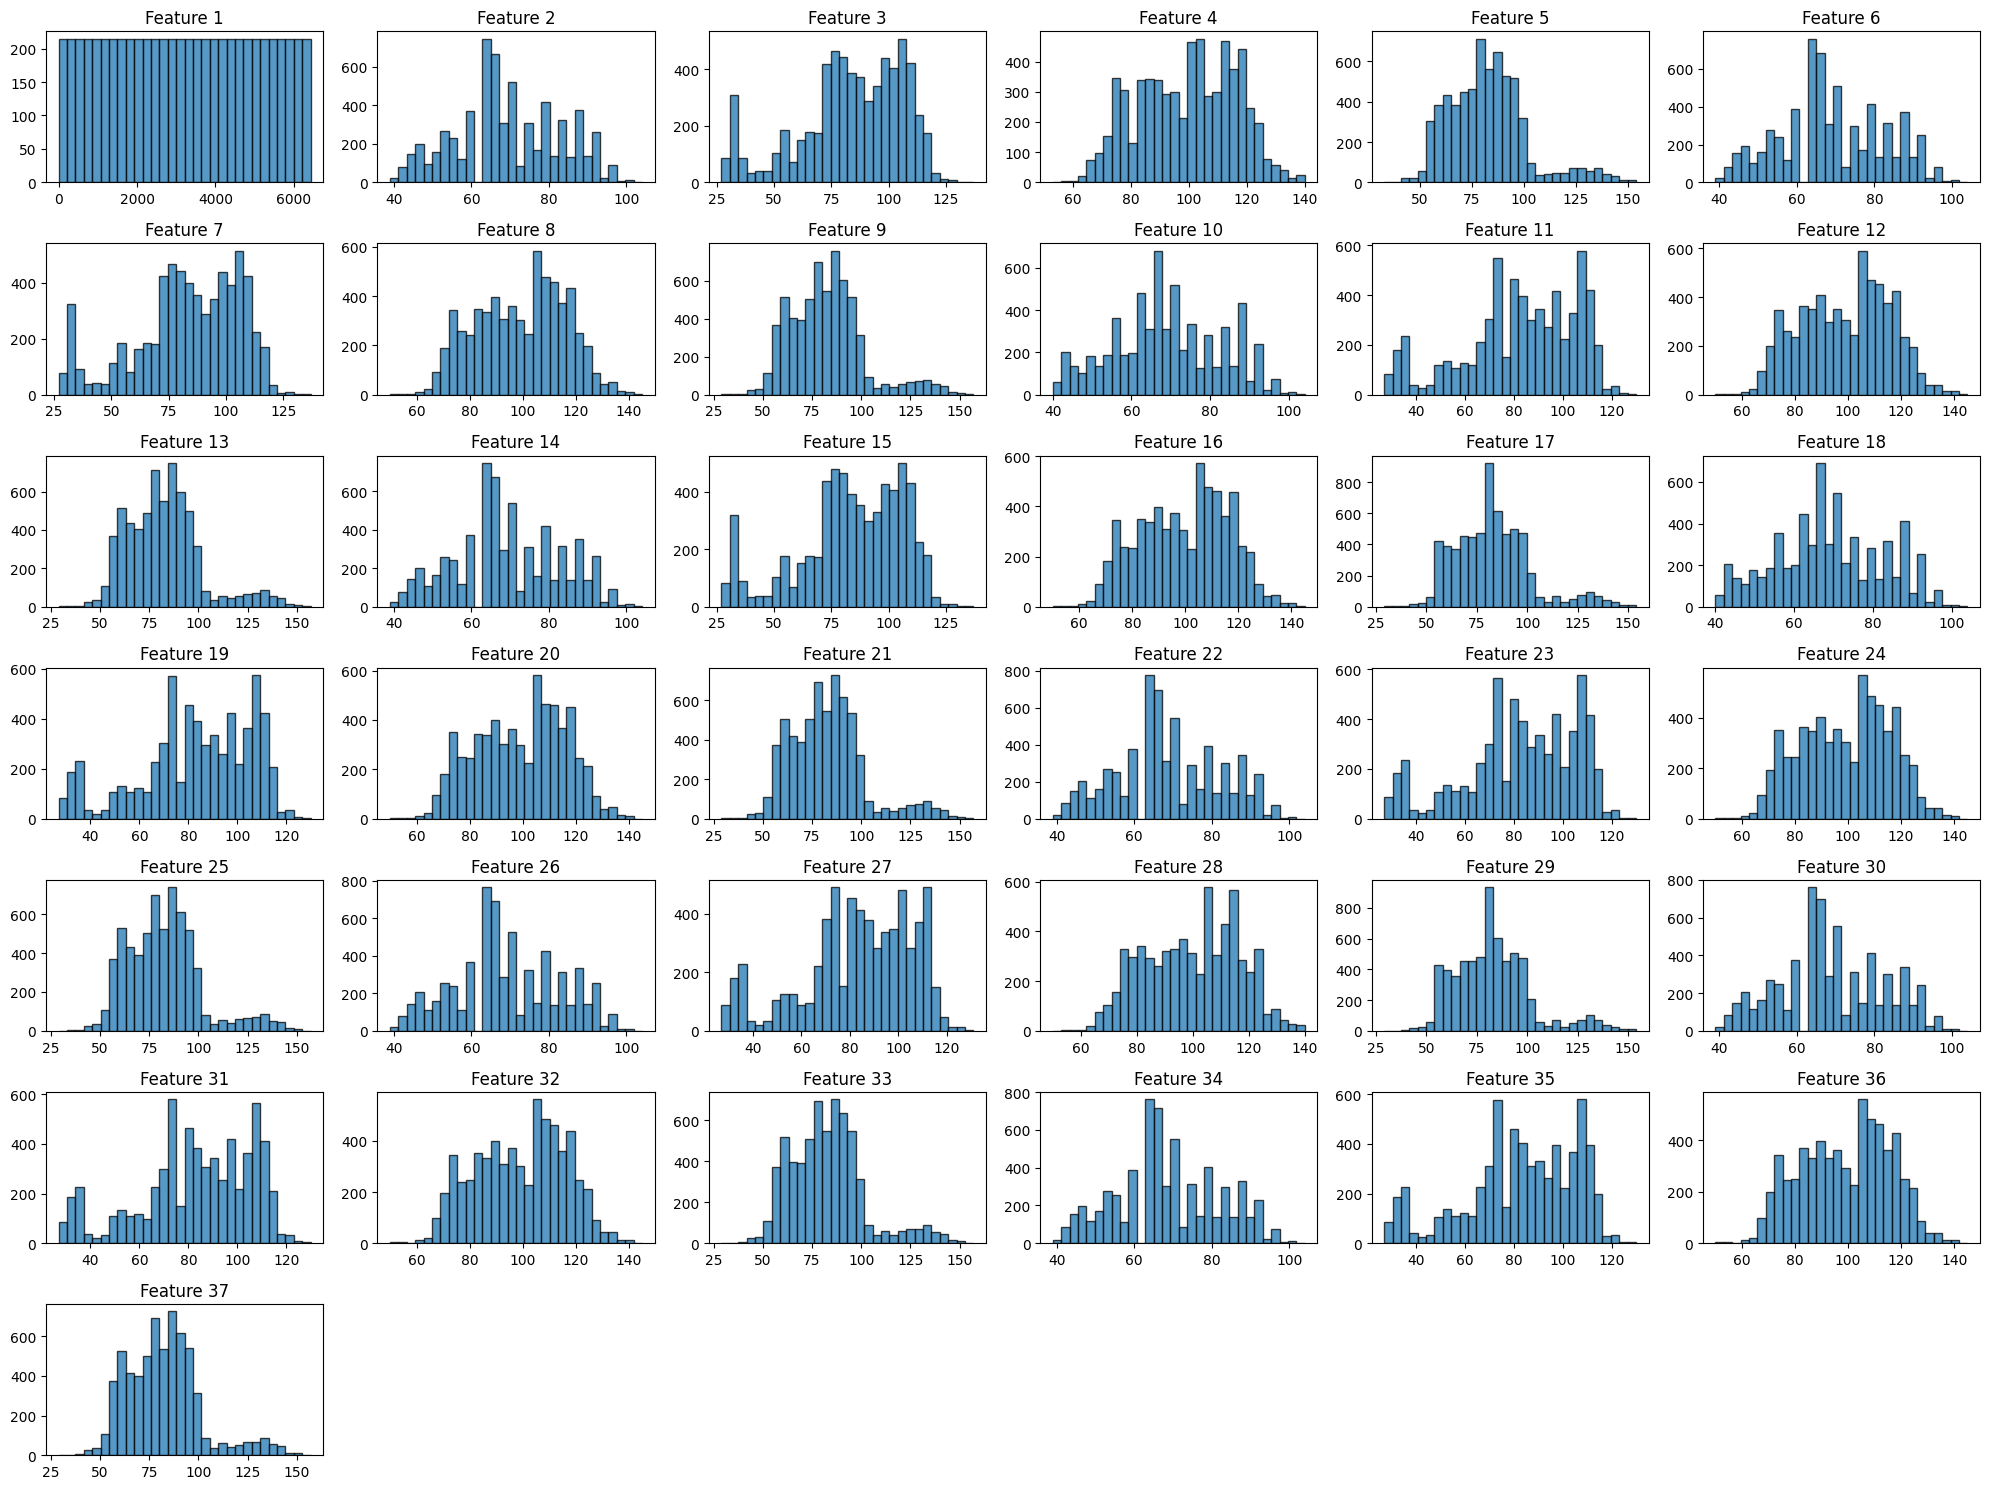

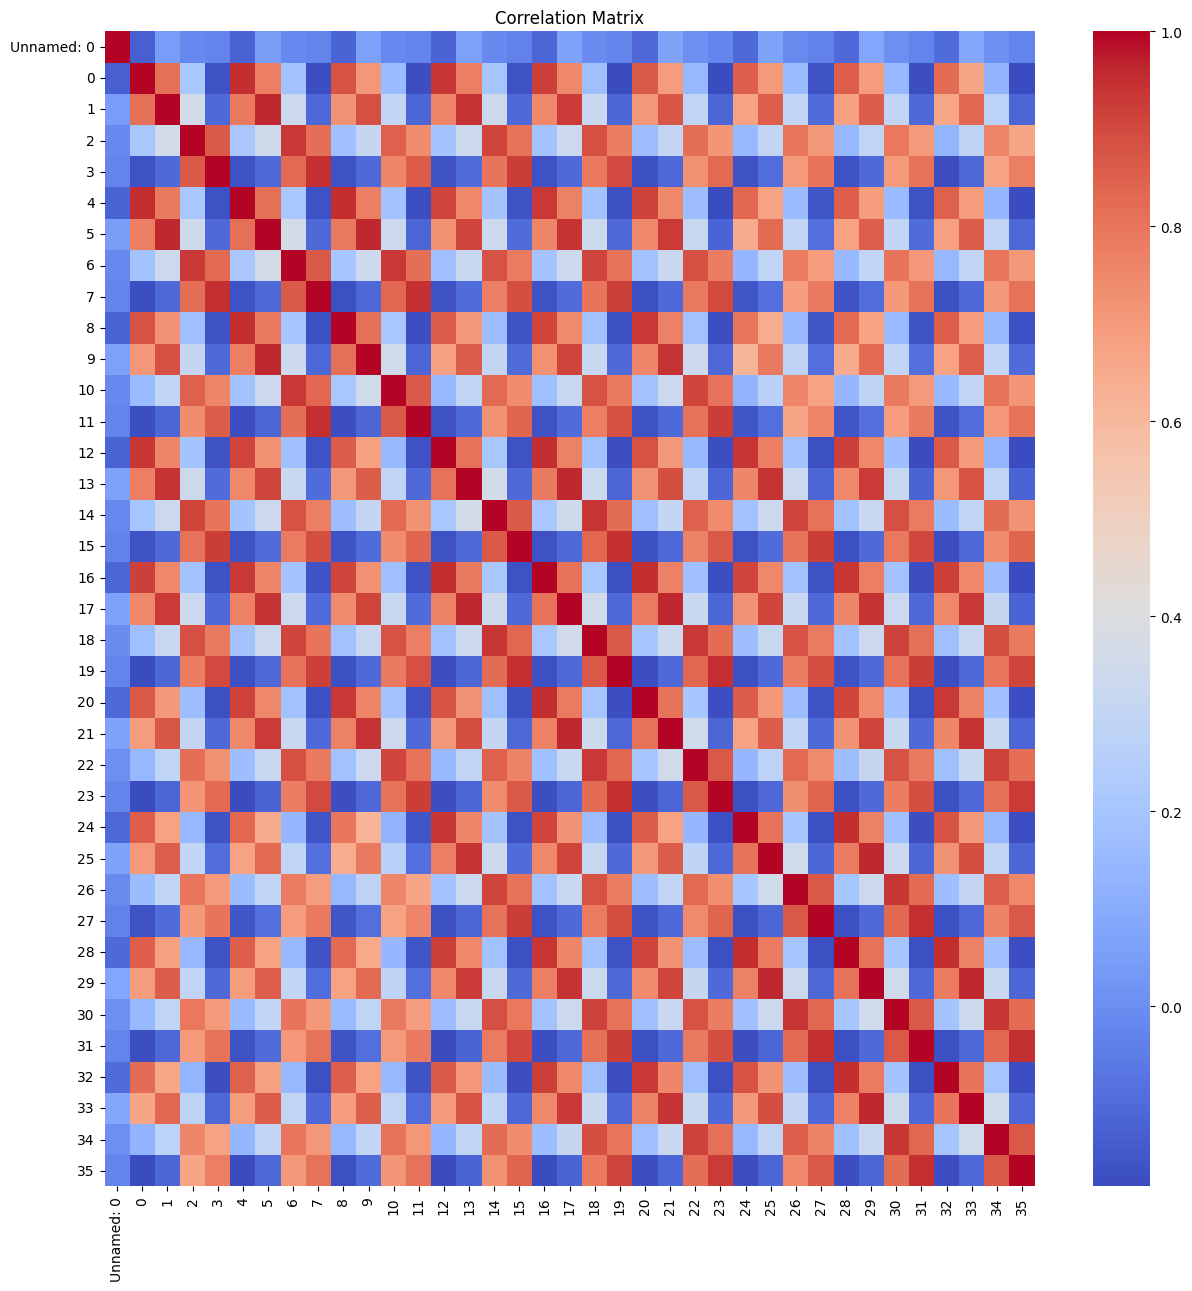

Valores únicos en y: [ 29  33  34  37  38  39  41  42  44  45  46  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  78  79  80  81  83  85  86  87  88  89  90  91  92  94
  96  97  98  99 100 101 102 103 104 105 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 124 125 126 127 128 129 131 132 133 135
 136 137 139 140 141 142 143 144 146 147 150 151 154 157]
Model: LOF
Training set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       3.0
          42       0.00      0.00      0.00       4.0
          44       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Model: KNN
Training set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       3.0
          42       0.00      0.00      0.00       4.0
          44       0.00      0.00      0.00       9.0
          45       0.00      0.00      0.00       6.0
          46       0.00      0.00      0.00       4.0
          48       0.00      0.00      0.00       8.0
          49       0.00      0.00      0.00      10.0
          50       0.00      0.00      0.00      14.0
          51       0.00      0.00      0.00       7.0
          52       0.00      0.00      0.00      13.0
          53       0.00      0.00      0.00      11.0
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

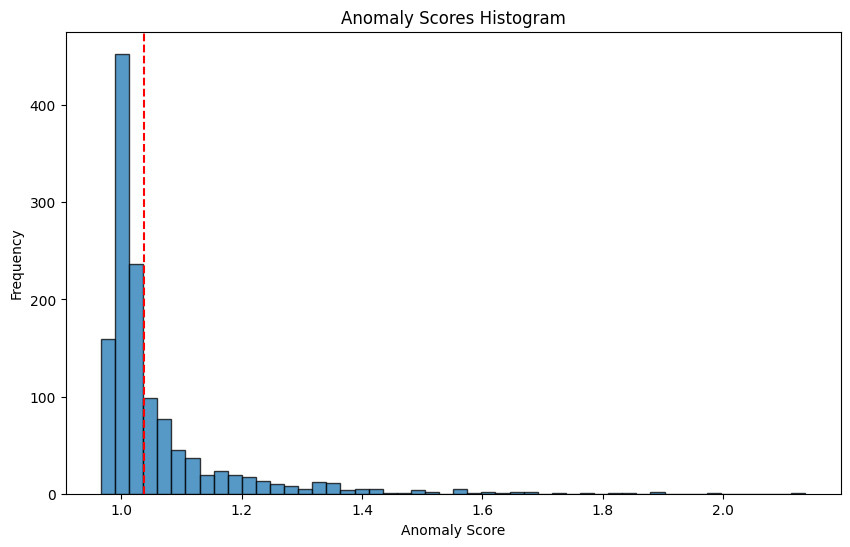

Testing set (adjusted threshold):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       3.0
          51       0.00      0.00      0.00       2.0
          52       0.00      0.00      0.00       5.0
          53       0.00      0.00      0.00       3.0
          54       0.00      0.00      0.00      15.0
          55       0.00      0.00      0.00      18.0
          56       0.00      0.00      0.00      12.0
          57       0.00      0.00      0.00      15.0
          58       0.00      0.00      0.00      29.0
          59       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Cargar el dataset
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

data = pd.read_csv(dataFolder + "/dataset/satellite.csv")

# Visualización de la distribución de cada característica
def plot_feature_distribution(data):
    num_features = data.shape[1]
    cols = 6
    rows = int(np.ceil(num_features / cols))
    plt.figure(figsize=(20, 15))
    for i in range(num_features):
        plt.subplot(rows, cols, i+1)
        plt.hist(data.iloc[:, i], bins=30, alpha=0.75, edgecolor='black')
        plt.title(f'Feature {i+1}')
    plt.tight_layout()
    plt.show()

plot_feature_distribution(data)

# Análisis de correlación entre características
corr_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Separar características y etiquetas
label_column = '35'  # Ajustar según el nombre real de la columna de etiquetas
X = data.drop(columns=[label_column])
y = data[label_column]

# Verificar que las etiquetas sean binarias
print(f'Valores únicos en y: {np.unique(y)}')

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prueba con diferentes algoritmos de PyOD
def train_and_evaluate_model(Model, X_train, X_test, y_train, y_test, contamination=0.32):
    model = Model(contamination=contamination)
    model.fit(X_train)
    y_train_scores = model.decision_scores_
    y_test_scores = model.decision_function(X_test)

    threshold = model.threshold_
    y_train_pred = (y_train_scores > threshold).astype(int)
    y_test_pred = (y_test_scores > threshold).astype(int)

    print(f'Model: {Model.__name__}')
    print('Training set:')
    print(classification_report(y_train, y_train_pred))
    print('Testing set:')
    print(classification_report(y_test, y_test_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))
    #print(f'ROC-AUC Score: {roc_auc_score(y_test, y_test_scores)}')
    print('-' * 80)

# Algoritmos a probar
models = [LOF, KNN, HBOS]

for model in models:
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

# Ajuste del umbral basado en el histograma
def plot_anomaly_scores_histogram(scores, threshold):
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=50, alpha=0.75, edgecolor='black')
    plt.axvline(threshold, color='red', linestyle='--')
    plt.title('Anomaly Scores Histogram')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.show()

model = LOF(contamination=0.32)
model.fit(X_train)
y_train_scores = model.decision_scores_
y_test_scores = model.decision_function(X_test)
threshold = model.threshold_

plot_anomaly_scores_histogram(y_test_scores, threshold)

# Ajuste del umbral (ejemplo de ajuste)
new_threshold = threshold - 0.05
y_test_pred_adjusted = (y_test_scores > new_threshold).astype(int)
print('Testing set (adjusted threshold):')
print(classification_report(y_test, y_test_pred_adjusted))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred_adjusted))
#print(f'ROC-AUC Score: {roc_auc_score(y_test, y_test_scores)}')


Pasos Siguientes
Análisis Exploratorio de Datos (EDA):

Visualiza la distribución de cada característica.
Analiza la correlación entre las características.
Identifica posibles características relevantes para la detección de anomalías.
Ajuste de Parámetros y Selección de Modelo:

Prueba con diferentes algoritmos de PyOD.
Ajusta los parámetros del modelo usando técnicas como validación cruzada.
Reevaluación del Umbral:

Basado en el histograma de los puntajes de anomalía, ajusta el umbral para mejorar la detección de anomalías.
Evaluación del Modelo:

Usa métricas adicionales como el ROC-AUC para evaluar el rendimiento del modelo.
Realiza un análisis de errores para entender mejor las fallas del modelo.

Explicación de los Pasos
Análisis Exploratorio de Datos (EDA):

Visualizamos la distribución de cada característica para entender mejor la distribución de los datos.
Calculamos la matriz de correlación para identificar posibles relaciones entre las características.
Ajuste de Parámetros y Selección de Modelo:

Probamos diferentes algoritmos de PyOD (LOF, KNN, HBOS) y evaluamos su rendimiento.
Ajustamos los parámetros del modelo utilizando técnicas de validación cruzada.
Reevaluación del Umbral:

Ajustamos el umbral basado en el histograma de los puntajes de anomalía para mejorar la detección.

Evaluación del Modelo:

Evaluamos el modelo utilizando métricas adicionales como ROC-AUC y analizamos la matriz de confusión para entender mejor las fallas del modelo.